### Title : Analyzing and Predicting Salary Trends in Texas State Government Agencies


### Problem Statement
The Texas state government seeks to understand the salary patterns within its various agencies comprehensively. This involves analyzing salary data, predicting payroll information, identifying wage disparities, and addressing outliers. The objectives are to analyze salary distributions, identify outliers, and predict payroll information, as well as understand wage disparities and changes over time in compensation for various roles and departments.

### Abstract
This thesis presents a detailed analysis and predictive modeling of salary data for the Texas state government. The study aims to uncover salary patterns, identify significant wage disparities, and develop a predictive model for payroll information. The analysis includes data preprocessing, exploratory data analysis, and modeling using multiple regression techniques. Key findings highlight the departments with the largest wage disparities, significant changes in salaries over time, and the effectiveness of different predictive models. The results offer valuable insights for equitable compensation practices and informed decision-making in the Texas state government.

### Introduction
Fair and transparent compensation practices are essential for maintaining employee satisfaction and equity within government agencies. The Texas state government, responsible for managing salaries across various departments, requires a detailed understanding of salary patterns to ensure fairness. This thesis aims to provide a comprehensive analysis of salary data, identify wage disparities, and develop a predictive model for payroll information. By examining trends and outliers in the dataset, this study seeks to inform more equitable compensation practices and decision-making processes.

### Data Collection
The dataset for this study was obtained from the Texas state government's salary records, as provided by the state comptroller. The dataset includes salary information for positions across 113 agencies within the Texas state government. Key attributes in the dataset include agency name, employee names, class titles, ethnicity, gender, employment dates, hourly rates, hours per week, monthly income, annual income, and state numbers. The data was collected in accordance with the Texas Public Information Act, ensuring transparency and accessibility.

### Domain Analysis
The domain analysis involves understanding the structure and intricacies of salary data within the Texas state government. This includes analyzing salary distributions, identifying potential outliers, and understanding the factors contributing to wage disparities. The analysis is segmented by agency, role, and demographic attributes to uncover significant patterns. Additionally, the study examines trends in salaries over time, providing insights into how compensation practices have evolved. The domain analysis forms the foundation for building predictive models and informing policy recommendations for equitable salary distribution.



### Data Understanding

1. **Agency:** The abbreviation or code representing the specific government agency.
2. **Agency Name:** The full name of the government agency.
3. **Last Name:** The last name of the employee.
4. **First Name:** The first name of the employee.
5. **MI (Middle Initial):** The middle initial of the employee's name.
6. **Class Title:** The official job title or classification of the employee's position.
7. **Ethnicity:** The employee's self-reported ethnic background.
8. **Gender:** The employee's self-reported gender.
9. **Status:** The employment status of the employee (e.g., full-time, part-time, temporary).
10. **Employ Date:** The date when the employee was hired by the agency.
11. **Hourly Rate:** The hourly wage rate of the employee.
12. **Hrs per Week:** The number of hours the employee works per week.
13. **Monthly Income:** The monthly salary of the employee.
14. **Annual Income:** The annual salary of the employee.
15. **State Number:** A unique identifier or code representing the state or state-level classification.

These attributes provide a comprehensive view of each employee's employment and salary details, allowing for a detailed analysis of salary patterns and disparities within the Texas state government.



## 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2. Load The Dataset

In [3]:
data=pd.read_csv('salary.csv')

## 3. Overview of Dataset

In [5]:
# Set the display option to show all columns in the DataFrame output
pd.set_option('display.max_columns',None)

In [7]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [9]:
# Display the last five rows of the dataset 
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

### General Information:
- **Total Entries:** 149,481 rows of data.
- **Data Columns:** 21 columns in total.
- **Memory Usage:** Approximately 23.9 MB.

### Columns and Data Types:
- **Numerical Columns:**
  - `AGENCY` (int64)
  - `HRLY RATE` (float64)
  - `HRS PER WK` (float64)
  - `MONTHLY` (float64)
  - `ANNUAL` (float64)
  - `STATE NUMBER` (int64)
  - `multiple_full_time_jobs` (float64)
  - `summed_annual_salary` (float64)

- **Categorical Columns:**
  - `AGENCY NAME` (object)
  - `LAST NAME` (object)
  - `FIRST NAME` (object)
  - `MI` (object)
  - `CLASS CODE` (object)
  - `CLASS TITLE` (object)
  - `ETHNICITY` (object)
  - `GENDER` (object)
  - `STATUS` (object)
  - `EMPLOY DATE` (object, but should be converted to datetime)
  - `duplicated` (object)
  - `combined_multiple_jobs` (object)
  - `hide_from_search` (object)

### Insights:
1. **Data Completeness:**
   - Columns like `duplicated`, `multiple_full_time_jobs`, `combined_multiple_jobs`, `summed_annual_salary`, and `hide_from_search` have significant missing values.

2. **Column Types:**
   - The `EMPLOY DATE` column should be converted from `object` to `datetime` to facilitate time-based analysis.

#### Conversion of EMPLOY DATE into Years and Days
- Converting EMPLOY DATE into years and days is essential for precise experience measurement. Experience, quantified in both years and days, is a crucial predictor of salary levels.

In [13]:
from datetime import datetime

# Convert 'EMPLOY_DATE' column to datetime
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'], format='%m/%d/%y')

In [15]:
# Convert the 'EMPLOY_DATE' column from object to datetime
# This column represents dates but is currently stored as an object.
# Converting it to datetime will allow for easier manipulation and analysis of date-related data.
from datetime import datetime
data['EMPLOY DATE'] = pd.to_datetime(data['EMPLOY DATE'])


### Tenure in days
# Get the current date
current_date = datetime.now()

# Calculate the tenure in days
data['Tenure_days'] = (current_date - data['EMPLOY DATE']).dt.days

## # Tenure in years
# Calculate the tenure in years
data['Tenure_years'] = (current_date - data['EMPLOY DATE']).dt.days / 365

In [17]:
data.drop(columns='EMPLOY DATE',inplace=True)

## 4. EDA

### 1. To check statistical terms like mean , median , mode, IQR etc

In [19]:
# to check the statistical terms of numerical columns
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary,Tenure_days,Tenure_years
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000,149481.000000,149481.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000,4009.673443,10.985407
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282,2480.801893,6.796718
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000,-16037.000000,-43.936986
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000,2224.000000,6.093151
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000,3008.000000,8.241096
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000,5129.000000,14.052055
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000,20444.000000,56.010959


* The dataset contains 149,481 entries, with complete data for most columns.

* The mean hourly rate is 545.74, with a standard deviation of 139.06.

* Employees work an average of 39.71 hours per week, with a standard deviation of 2.32.

* The mean annual salary is 50,714.21, ranging from 600 to 553,500.

* Entries for multiple full-time jobs are rare, with only 14 such instances.

In [21]:
# to check the statistical terms of categorical columns
data.describe(include='O')

,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,duplicated,combined_multiple_jobs,hide_from_search
count,149481,149481,149481,149481,149481,149481,149481,149481,149481,143,97,16
unique,113,38675,23559,27,1481,1422,6,2,11,1,1,1
top,HEALTH AND HUMAN SERVICES COMMISSION ...,SMITH,MICHAEL,,4504,CORREC OFFICER IV ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,True,True,True
freq,36667,1243,1843,38408,9267,9267,67142,85328,142502,143,97,16


* Diversity: The dataset includes employees from 113 different agencies, with unique identifiers for last names (38,675), first names (23,559), and middle initials (27).

* Job Information: There are 1,481 unique class codes and 1,422 unique class titles, indicating a wide variety of job classifications.

* Demographics: The data covers 6 ethnicities and 2 genders, with "WHITE" and "FEMALE" being the most frequently occurring categories.

* Employment Status: The most common employment status is "CRF - CLASSIFIED REGULAR FULL-TIME".

* Duplicates: There are 143 entries marked as duplicates.

* Multiple Jobs: There are 97 entries indicating combined multiple jobs, and 16 entries should be hidden from search.

### 2. Univariate Analysis

In [47]:
# numerical columns
cont_col = data[['HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL','Tenure_days','Tenure_years']]

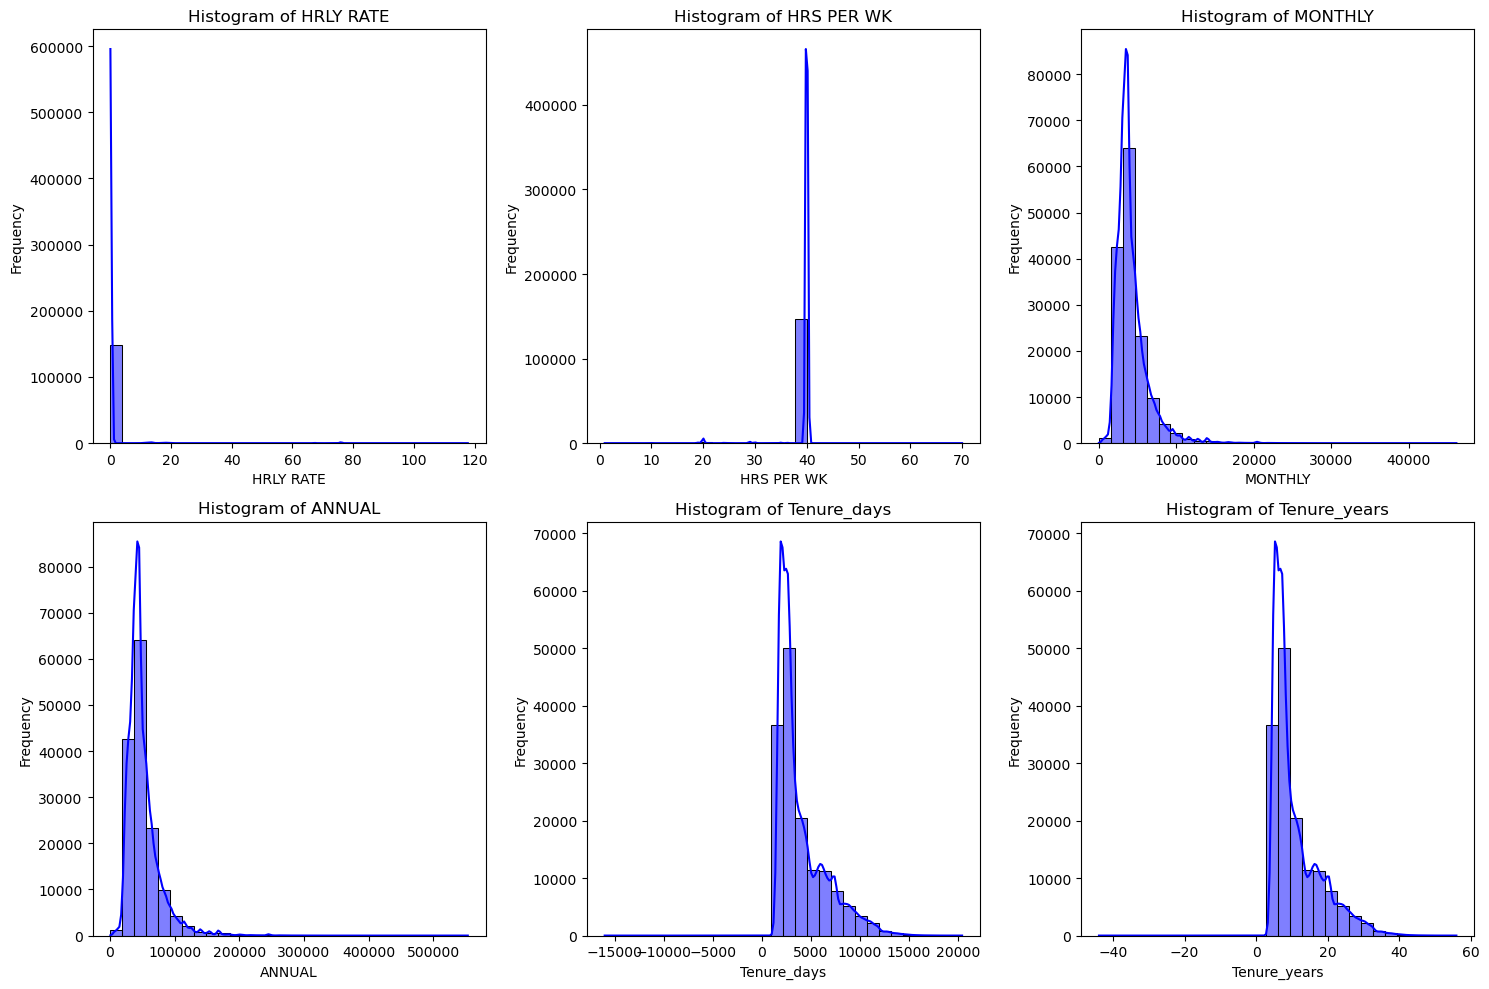

In [33]:
# Plot histograms
plt.figure(figsize=(15, 10), facecolor='white')  # Set canvas size and background color
for i, col in enumerate(cont_col, 1):
    plt.subplot(2, 3, i)  # Adjust the grid to fit all columns
    sns.histplot(data[col], kde=True, bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Conclusion:

* **HRLY RATE:**

The majority of individuals earn lower hourly rates, with a significant concentration around the lower end of the spectrum.

Higher hourly rates are much less common, indicating a disparity in earnings among the population.

* **HRS PER WK:**

Most individuals work around 40 hours per week, as evidenced by the peak around this mark.

There is a smaller number of individuals working significantly more or fewer hours per week, suggesting that a standard 40-hour workweek is prevalent.

* **MONTHLY:**

Monthly earnings are primarily clustered at the lower end, with a peak at lower salary ranges.

Higher monthly earnings are rare, indicating that most individuals have lower monthly incomes.

* **ANNUAL:**

The annual salary distribution is right-skewed, meaning most individuals earn lower annual salaries, with a few earning significantly higher amounts.

The peak at the lower end suggests that a substantial portion of the population falls within the lower salary bracket.

* **Tenure_days :**

The histogram for "Tenure_days" shows a right-skewed distribution, with most employees having shorter tenures clustered around 0 to 5000 days, and only a few having significantly longer tenures beyond 10000 days.

* **Tenure_years :**

The histogram for "Tenure_years" also displays a right-skewed distribution, with the majority of employees having shorter tenures concentrated around 0 to 10 years, and very few having tenures exceeding 20 years.

In [ ]:
# countplot for categorical colums

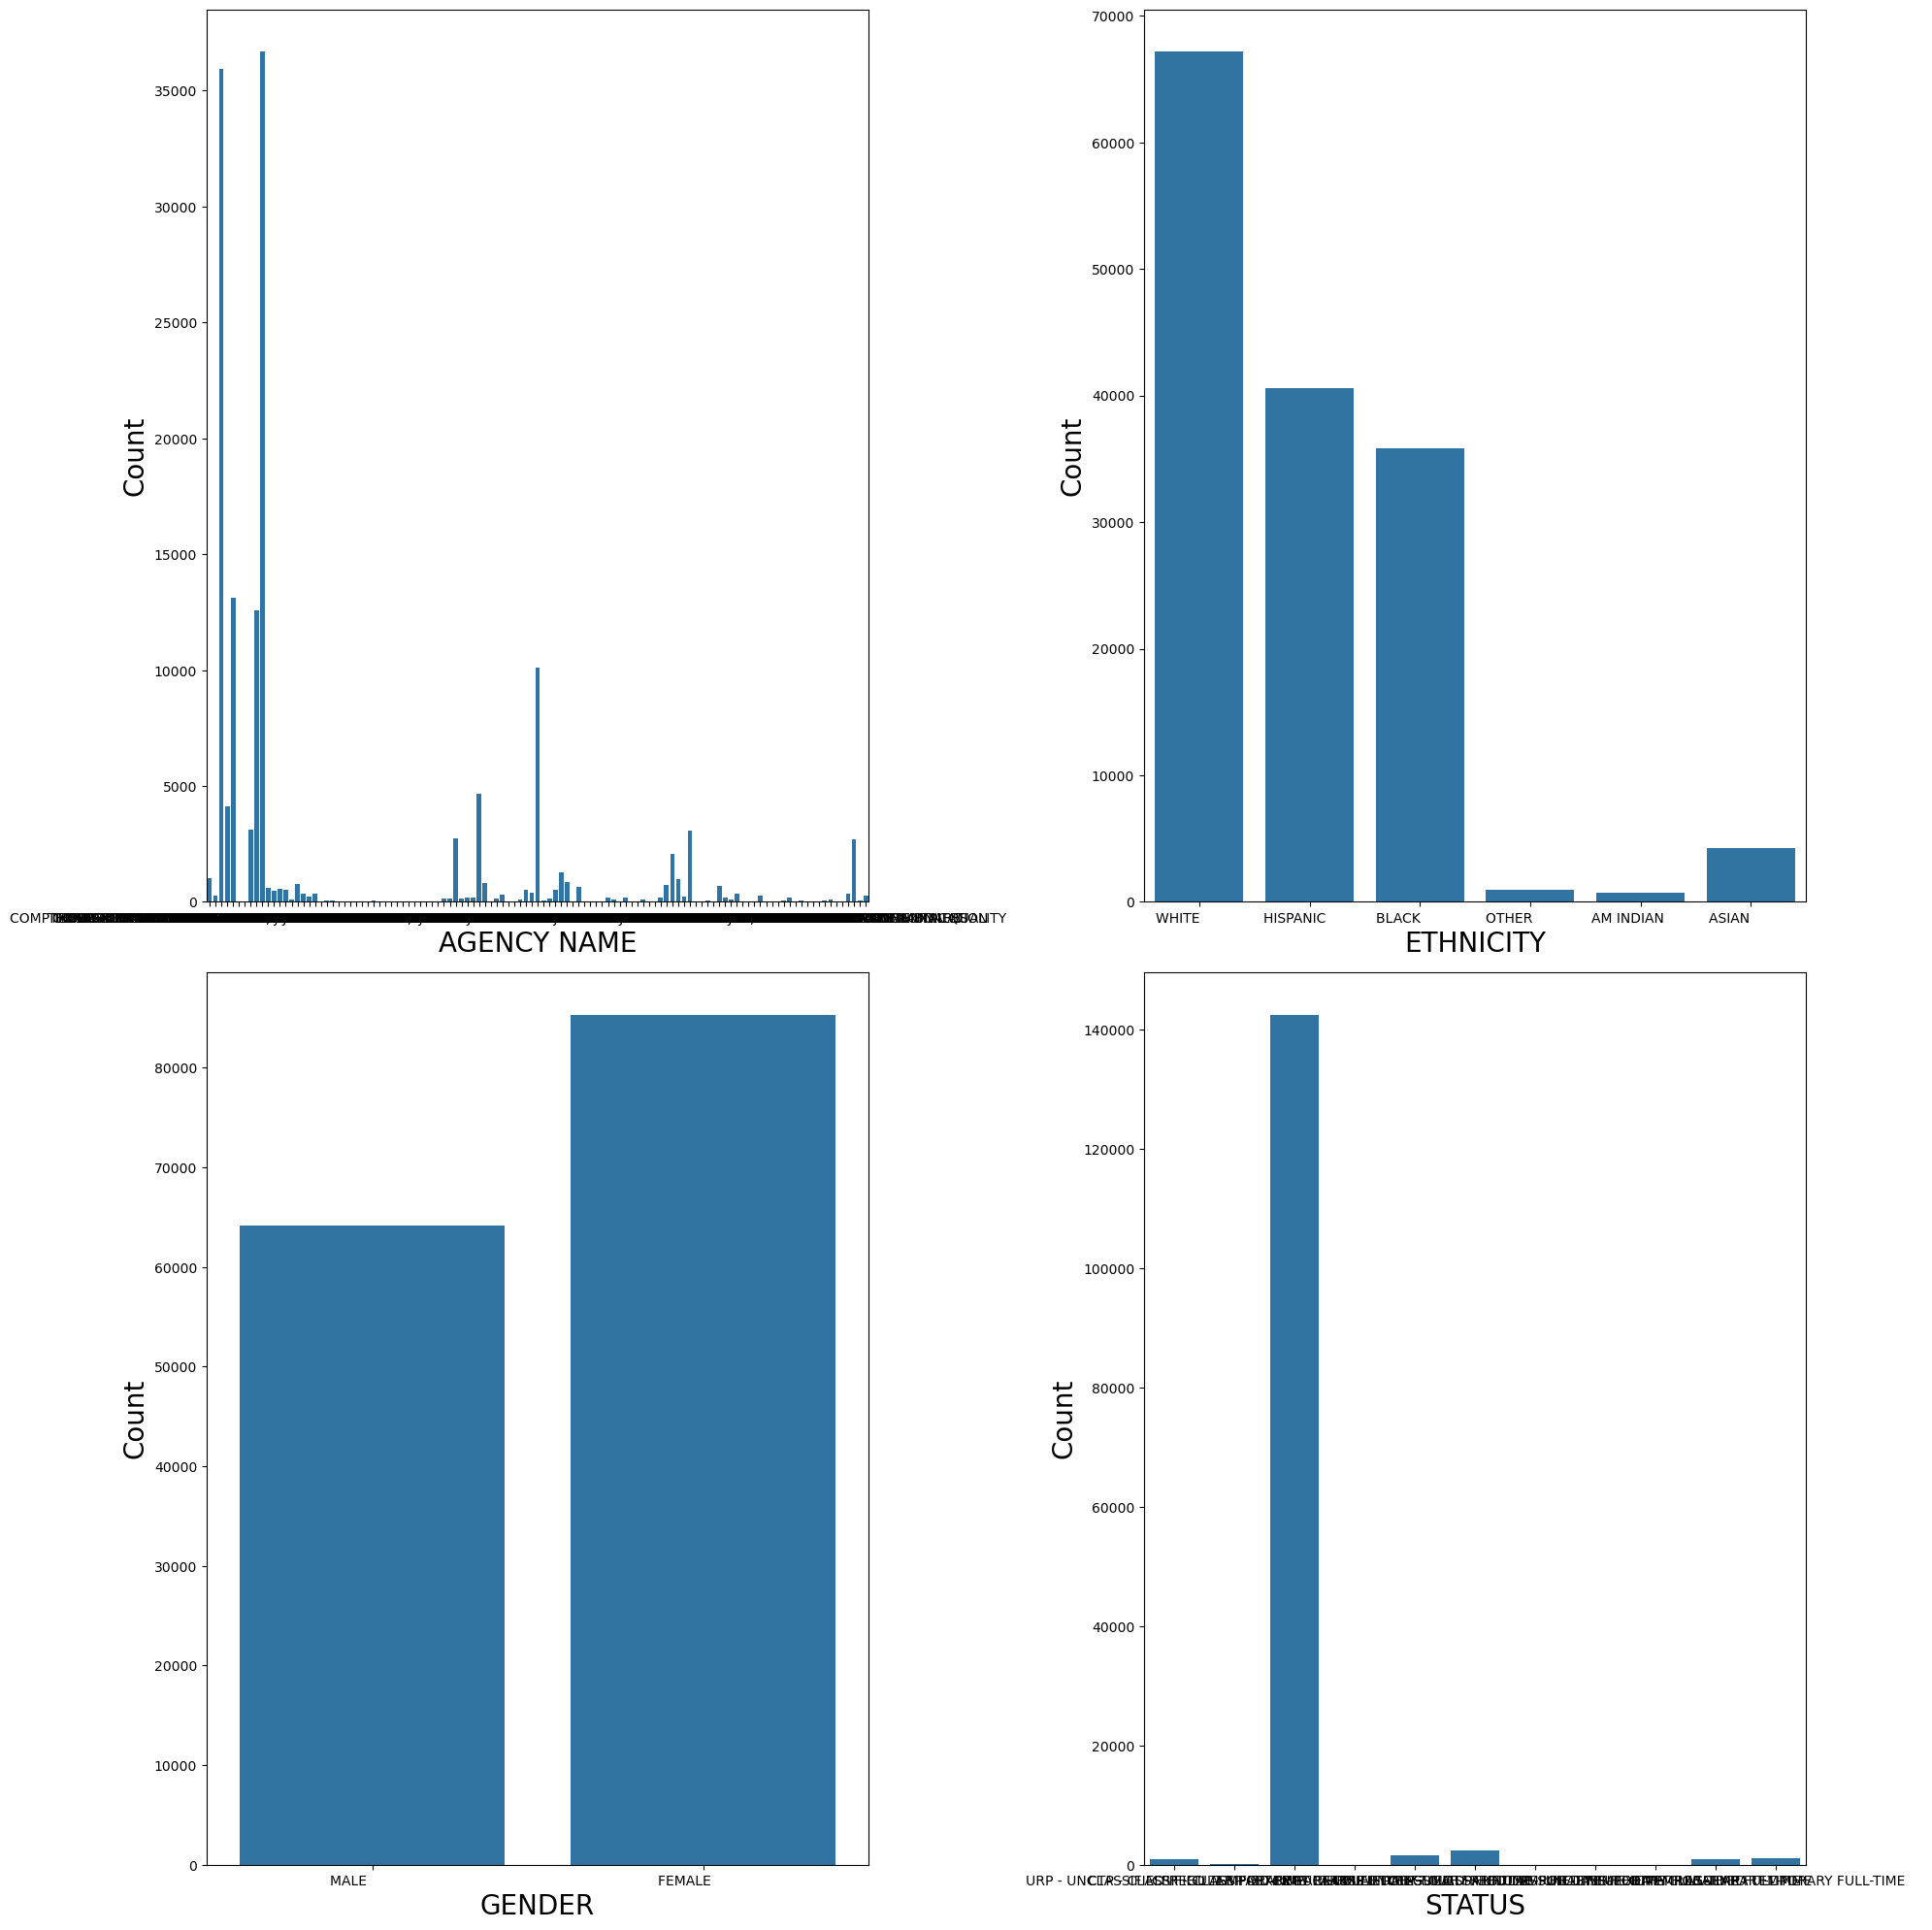

In [45]:
cat_col=data[['AGENCY NAME','ETHNICITY','GENDER', 'STATUS',]]
plt.figure(figsize=(20,20), facecolor='white')#To set canvas 
plotnumber = 1#counter

for column in cat_col:#accessing the columns 
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(x=data[column])
        plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

### Conclusions:

* **Agency Name:**

The bar chart for "AGENCY NAME" shows a distribution of counts for different agencies, with a few agencies having significantly higher counts compared to others. This indicates that the dataset contains more data points from those particular agencies, potentially affecting the analysis and predictions.

* **Ethnicity:**

The bar chart for "ETHNICITY" shows the distribution of counts for different ethnicities. The "WHITE" category has the highest count, followed by "HISPANIC," "BLACK," and "ASIAN." The categories "OTHER" and "AM INDIAN" have the lowest counts, indicating a potential imbalance in the representation of different ethnicities in the dataset.

* **GENDER:**
  
The bar chart for "GENDER" shows that there are more FEMALE employees than MALE employees in the dataset. The count of FEMALE employees is higher compared to the count of MALE employees.

* **STATUS Bar Chart:**

The bar chart for "STATUS" indicates that the employment status with the highest count is "URP - UNCLASSIFIED REGULAR PART-TIME," while other employment status categories have significantly lower counts.

### 2. Bivariate Analysis

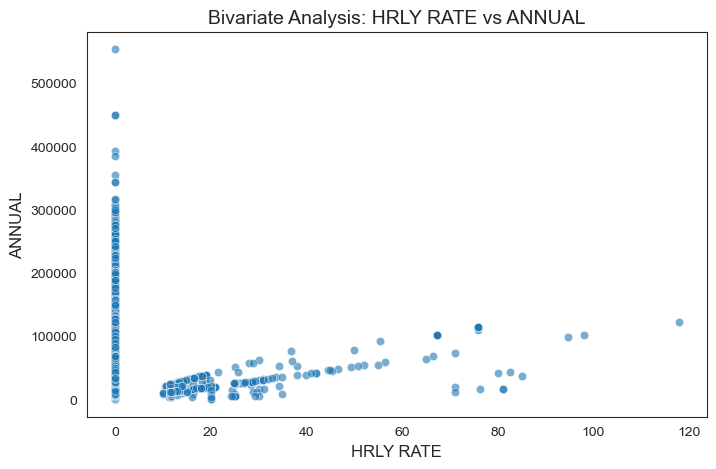

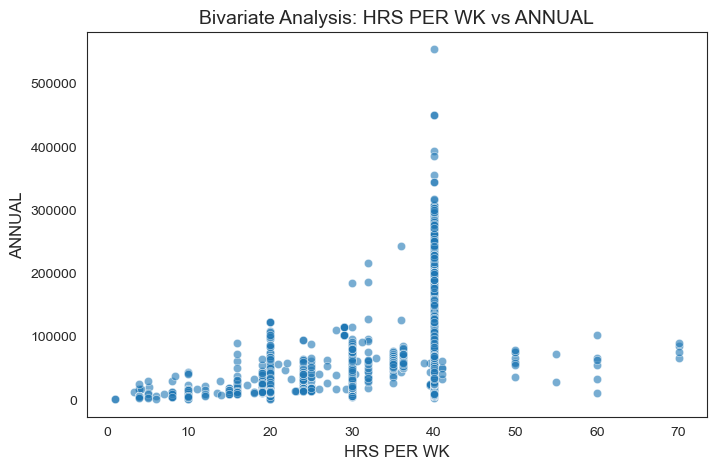

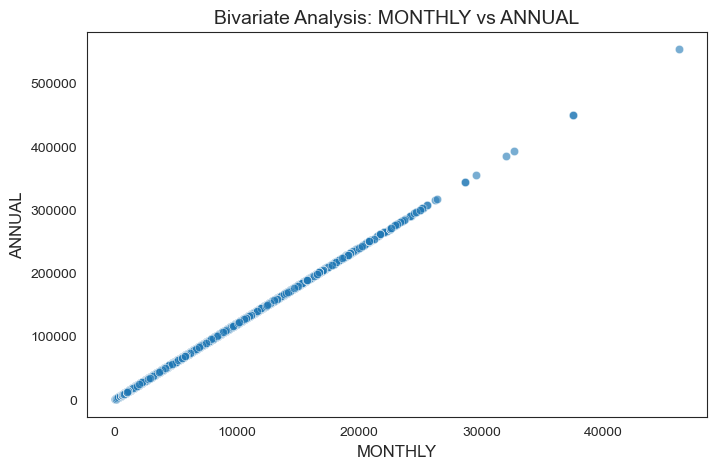

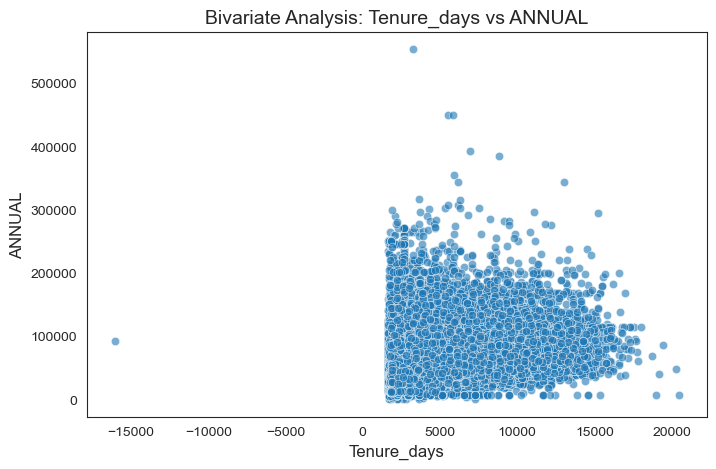

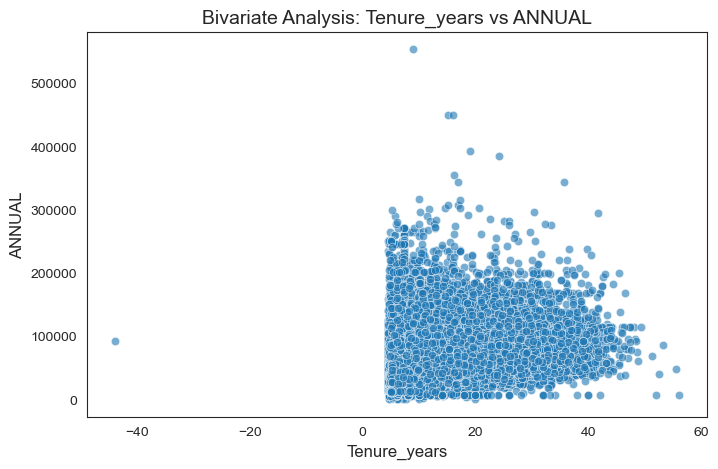

In [36]:
## Bivariate for continuous columns

# Set the style to remove the white grid background
sns.set_style("white")

# List of continuous columns to analyze
cont_col = ['HRLY RATE', 'HRS PER WK', 'MONTHLY','Tenure_days','Tenure_years']

# Loop through each column and plot against 'ANNUAL'
for col in cont_col:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=data[col], y=data['ANNUAL'], alpha=0.6)
    plt.title(f'Bivariate Analysis: {col} vs ANNUAL', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('ANNUAL', fontsize=12)
    plt.show()

### Conclusion: 

* **HRLY RATE vs ANNUAL:**

The scatter plot for "HRLY RATE" vs "ANNUAL" demonstrates a clear positive correlation between hourly rate and annual salary. As the hourly rate increases, the annual salary tends to increase proportionally, with some outliers. This relationship is crucial for understanding how hourly wages translate to annual earnings and can be beneficial for developing salary prediction models.

* **HRS PER WK:**

The scatter plot for "HRS PER WK" vs "ANNUAL" shows a positive correlation between the number of hours worked per week and annual salary. As the number of hours worked per week increases, the annual salary tends to increase as well, with some variations and outliers. This analysis is useful for understanding how the weekly hours worked influence annual earnings, providing insights for salary prediction models.

* **MONTHLY:**

The scatter plot for "MONTHLY" vs "ANNUAL" salary demonstrates a clear positive correlation between monthly salary and annual salary. As the monthly salary increases, the annual salary also increases proportionally, forming a strong linear pattern. This relationship is crucial for developing accurate salary prediction models.

* **Tenure_days:**
  
The scatter plot for "Tenure_days" vs "ANNUAL" demonstrates a weak positive correlation. As the number of tenure days increases, the annual salary also tends to increase, but with considerable variation among the data points.

* **Tenure_years:**
  
The scatter plot for "Tenure_years" vs "ANNUAL" shows a similar weak positive correlation. As the tenure years increase, the annual salary tends to rise, but there is significant variation, indicating that factors other than tenure also influence annual salary.

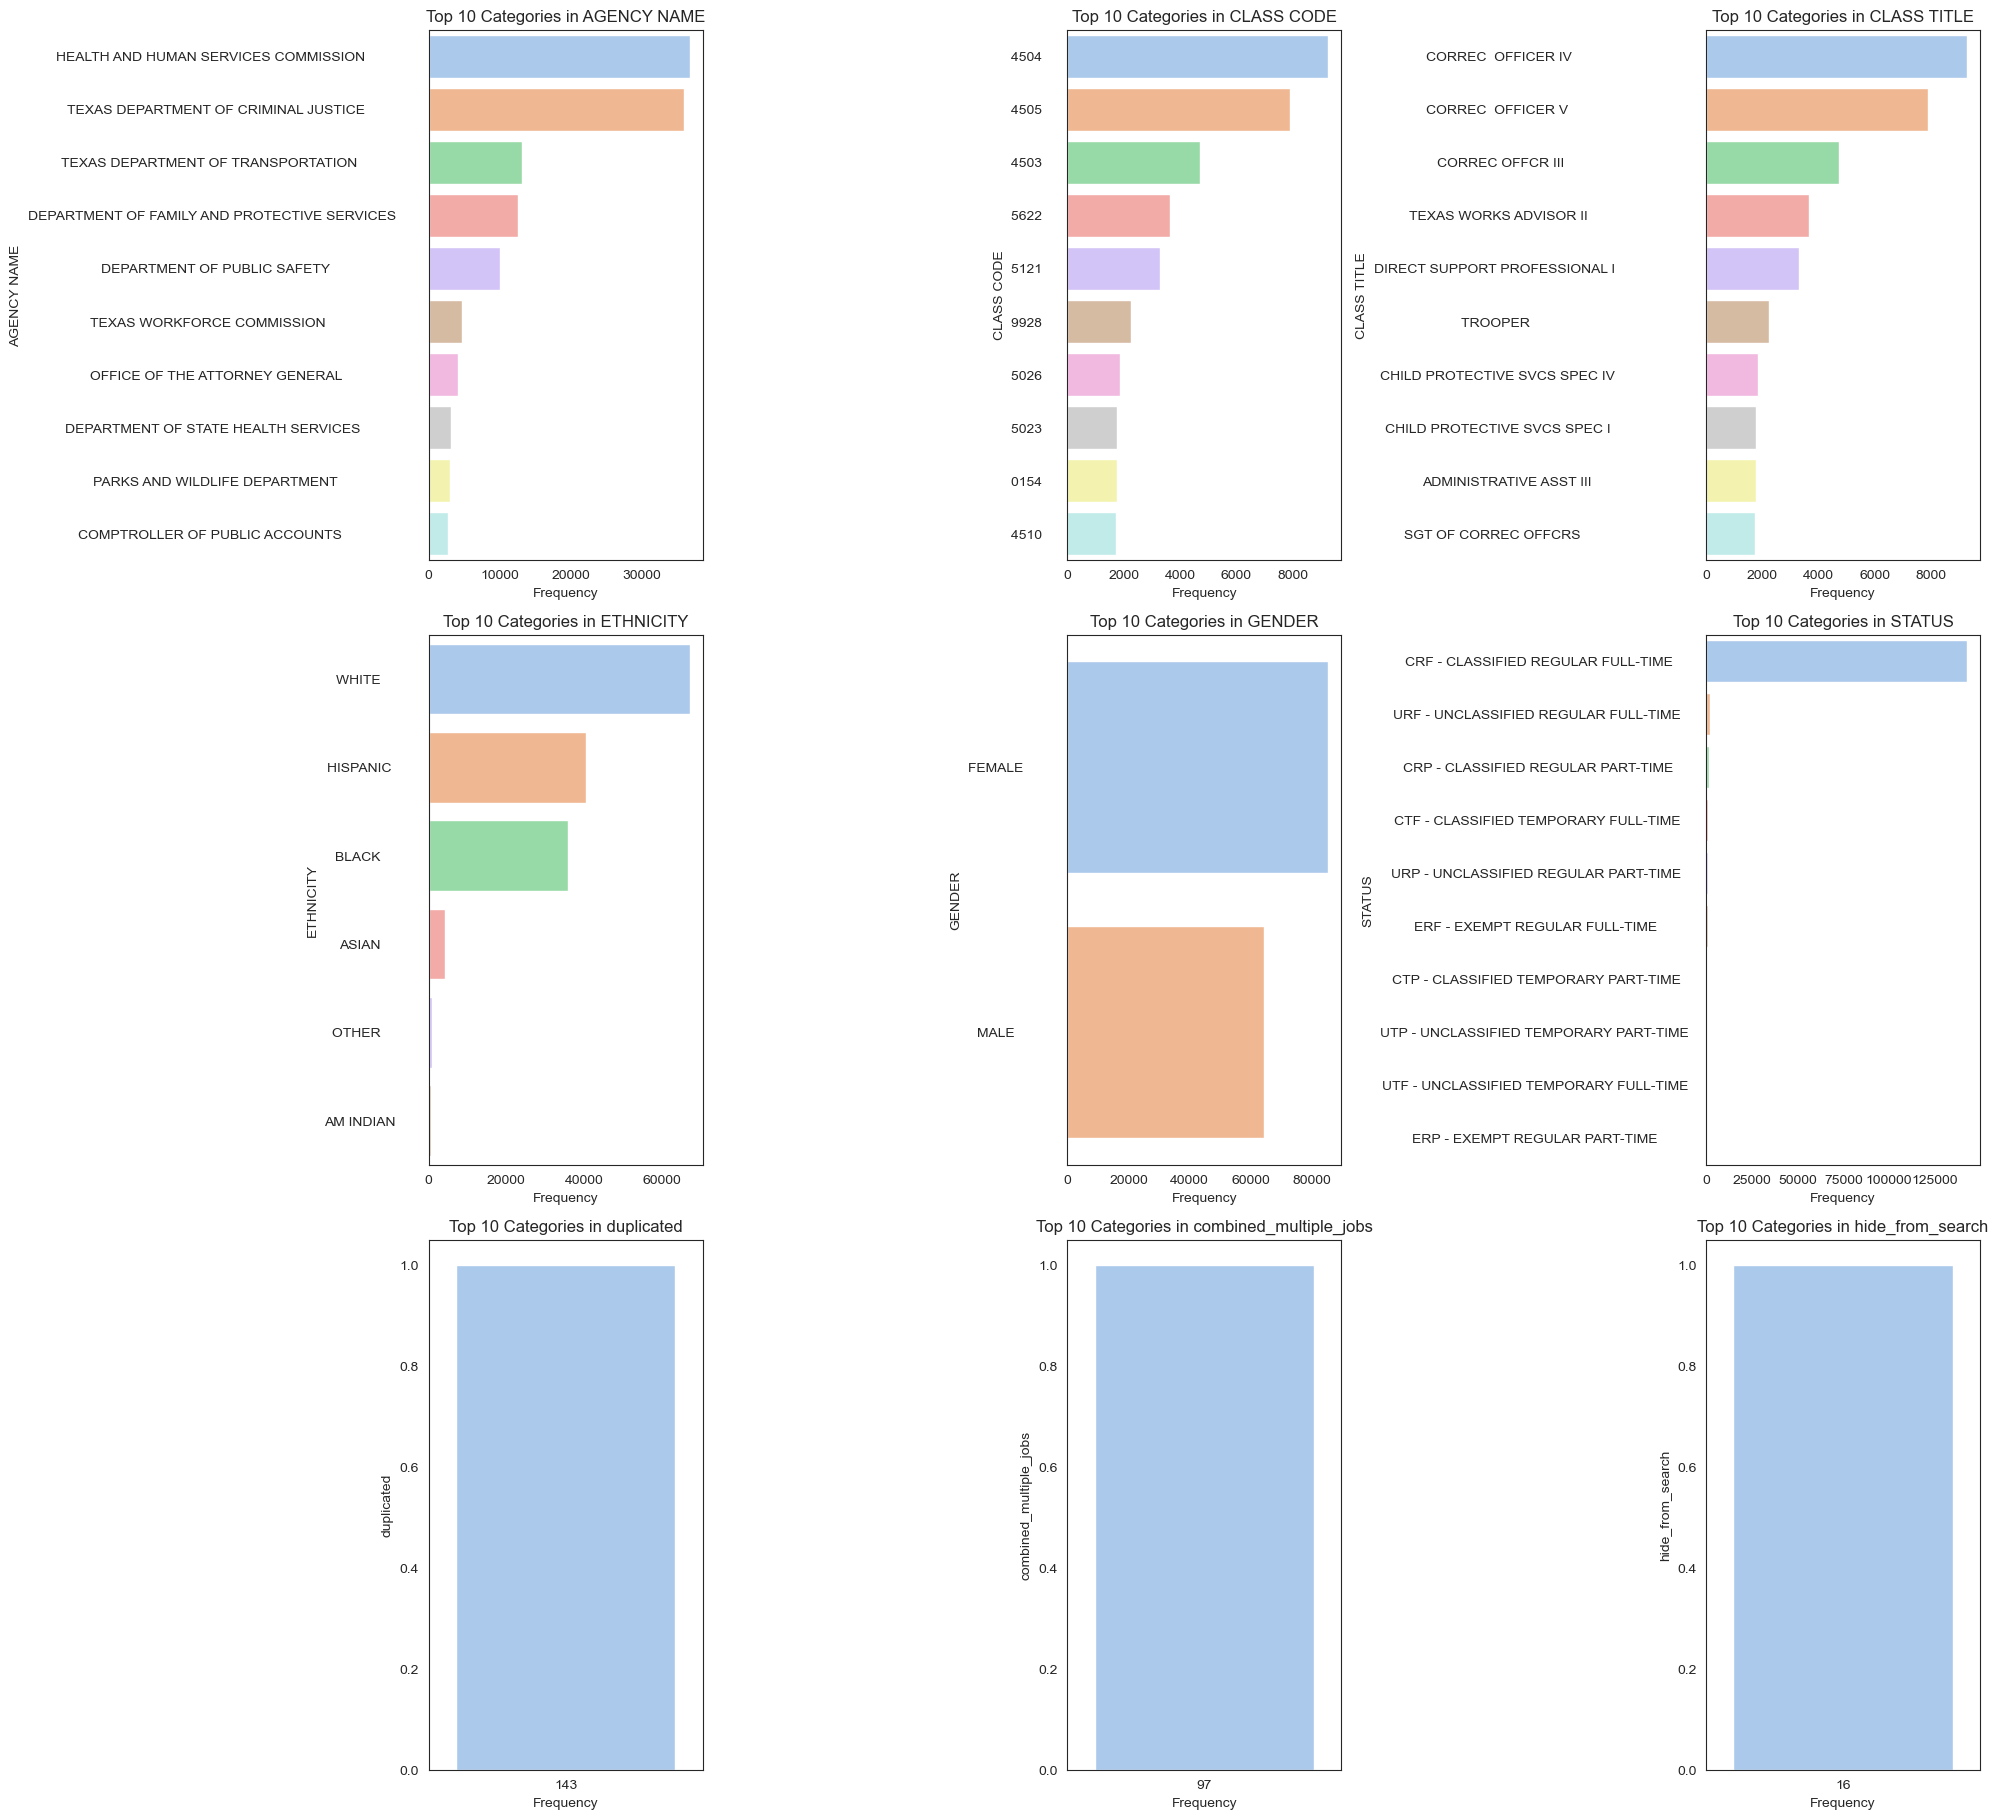

In [40]:
### Bivariate for categorical

# List of categorical columns
catg_col = ['AGENCY NAME','CLASS CODE', 
            'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 
            'duplicated', 'combined_multiple_jobs', 'hide_from_search']

# Plot only top 10 categories for each column
plt.figure(figsize=(20, 30), facecolor='white')
for i, col in enumerate(catg_col, 1):
    plt.subplot(5, 3, i)
    top_categories = data[col].value_counts().head(10)  # Top 10 categories
    sns.barplot(x=top_categories.values, y=top_categories.index, palette='pastel')
    plt.title(f'Top 10 Categories in {col}')
    plt.xlabel('Frequency')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Conclusions:

* **Agency Name:**

The bar chart for "AGENCY NAME" reveals a significant variation in the number of records among different agencies. Some agencies have much higher counts than others, indicating a potential imbalance in the dataset.

* **Class Code:**

The bar chart for "CLASS CODE" displays the frequency of the top 10 class codes. Certain class codes appear more frequently, suggesting that these roles are more common in the dataset.

* **Class Title :**

The bar chart for "CLASS TITLE" shows the distribution of the top 10 class titles, with job titles like "CORREC OFFICER IV," "CORREC OFFICER V," and "CORREC OFFICR III" being the most frequently represented. This highlights the prevalence of specific job titles within the dataset.

* **Ethnicity:**

The bar chart for "ETHNICITY" shows that the "WHITE" category has the highest representation, followed by "HISPANIC," "BLACK," and "ASIAN." The "OTHER" and "AM INDIAN" categories have the lowest counts, highlighting an imbalance in ethnic representation.

* **Gender:**

The bar chart for "GENDER" indicates that there are more "FEMALE" employees compared to "MALE" employees in the dataset, reflecting a higher representation of females in the data.

* **Status:**

The bar chart for "STATUS" shows that the most common employment status is "CRF - CLASSIFIED REGULAR FULL-TIME," followed by "URF - UNCLASSIFIED REGULAR FULL-TIME." Other employment statuses have significantly lower counts, indicating a concentration of employees in these two categories.

* **Duplicated:**

The bar chart for "Top 10 Categories in duplicated" shows a frequency value of 143, indicating a significant number of duplicate entries in this category within the dataset.

* **Combined_multiple_jobs:**

The bar chart for "Top 10 Categories in combined_multiple_jobs" shows a frequency value of 97, highlighting the prevalence of multiple job roles combined into single entries in the dataset.

* **Hide_from_search:**

The bar chart for "Top 10 Categories in hide_from_search" shows a frequency value of 16, indicating a smaller number of entries that are hidden from search results within the dataset.

## 5. Data Preprocessing

Data preprocessing refers to the critical process of transforming raw data into a clean and usable format for analysis. It involves various steps aimed at addressing inconsistencies, handling missing values, removing noise, and making the data suitable for machine learning models. This stage is foundational for building effective predictive models
### **Importance of Data Preprocessing**
#### Enhancing Data Quality :
- Cleaning: Removes inaccuracies, duplicates, and irrelevant entries, ensuring that the data is reliable and valid.
- Handling Missing Values: Missing data can lead to biased or incorrect models. Techniques like imputation or removal ensure that the dataset remains robust.
- Removing Outliers: Outliers can skew the results and affect the performance of the model. Identifying and handling them helps in achieving more accurate predictions.
#### Improving Model Performance :
- Feature Scaling: Normalizes data to ensure that features with different scales do not disproportionately affect the model. Common techniques include normalization and standardization.
- Feature Engineering: Creates new features or modifies existing ones to provide more relevant information to the model, thereby enhancing predictive power.                                                                                                                                                                                                                                                                                                                    
#### Ensuring Consistency :
- Encoding Categorical Variables: Converts categorical data into numerical values, making it compatible with machine learning algorithms.
- Consistent Formatting: Ensures all data entries follow a uniform format, reducing errors during analysis
#### Reducing Complexity :
- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) reduce the number of features while retaining essential information, simplifying the dataset for better analysis.
#### Enhancing Interpretability :
- Data Cleaning: Removes noise and irrelevant information, making the dataset more manageable and easier to interpret.
- Standardization: Ensures that data is presented in a consistent manner, aiding in clearer insights and comparisons. 
#### Improving Model Generalization :
- Data Augmentation: Generating additional data points can help in preventing overfitting and improve the model's ability to generalize to new data.     

### 1. Checking missing values / null values

In [24]:
data.isnull().sum()

AGENCY                          0
AGENCY NAME                     0
LAST NAME                       0
FIRST NAME                      0
MI                              0
CLASS CODE                      0
CLASS TITLE                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
HRLY RATE                       0
HRS PER WK                      0
MONTHLY                         0
ANNUAL                          0
STATE NUMBER                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
Tenure_days                     0
Tenure_years                    0
dtype: int64

In [25]:
# Calculate the percentage of missing values for each column
missing_percent = data.isnull().mean() * 100
print(missing_percent)

AGENCY                      0.000000
AGENCY NAME                 0.000000
LAST NAME                   0.000000
FIRST NAME                  0.000000
MI                          0.000000
CLASS CODE                  0.000000
CLASS TITLE                 0.000000
ETHNICITY                   0.000000
GENDER                      0.000000
STATUS                      0.000000
HRLY RATE                   0.000000
HRS PER WK                  0.000000
MONTHLY                     0.000000
ANNUAL                      0.000000
STATE NUMBER                0.000000
duplicated                 99.904336
multiple_full_time_jobs    99.990634
combined_multiple_jobs     99.935109
summed_annual_salary       99.989296
hide_from_search           99.989296
Tenure_days                 0.000000
Tenure_years                0.000000
dtype: float64


#### Dropping columns with more than 99% missing values

In [27]:
data.drop(columns=['duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', 'hide_from_search'], 
          inplace=True)

In [28]:
# After dropping columns which are having the highest percentage of missing values
data.isnull().sum()

AGENCY          0
AGENCY NAME     0
LAST NAME       0
FIRST NAME      0
MI              0
CLASS CODE      0
CLASS TITLE     0
ETHNICITY       0
GENDER          0
STATUS          0
HRLY RATE       0
HRS PER WK      0
MONTHLY         0
ANNUAL          0
STATE NUMBER    0
Tenure_days     0
Tenure_years    0
dtype: int64

### 3. Encoding

Encoding is a crucial step in data preprocessing, particularly when dealing with categorical data. In the context of machine learning and data analysis, encoding refers to the process of converting categorical variables into numerical formats that can be understood and processed by algorithms.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  HRLY RATE     149481 non-null  float64
 11  HRS PER WK    149481 non-null  float64
 12  MONTHLY       149481 non-null  float64
 13  ANNUAL        149481 non-null  float64
 14  STATE NUMBER  149481 non-null  int64  
 15  Tenure_days   149481 non-null  int64  
 16  Tenure_years  149481 non-null  float64
dtypes: float64(5), int64(3), object(9)
memory usage:

#### 1. AGENCY NAME

In [32]:
print(data['AGENCY NAME'].unique())

['COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION '
 'OFFICE OF COURT ADMINISTRATION                    '
 'TEXAS DEPARTMENT OF CRIMINAL JUSTICE              '
 'OFFICE OF THE ATTORNEY GENERAL                    '
 'TEXAS DEPARTMENT OF TRANSPORTATION                '
 'TEXAS BEHAVIORAL HEALTH EXECUTIVE COUNCIL         '
 'BOARD OF EXAMINERS OF PSYCHOLOGISTS               '
 'DEPARTMENT OF STATE HEALTH SERVICES               '
 'DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES      '
 'HEALTH AND HUMAN SERVICES COMMISSION              '
 'DEPARTMENT OF AGRICULTURE                         '
 'SCHOOL FOR THE BLIND AND VISUALLY IMPAIRED        '
 'SCHOOL FOR THE DEAF                               '
 'SENATE                                            '
 'LEGISLATIVE BUDGET BOARD                          '
 'HOUSE OF REPRESENTATIVES                          '
 'TEXAS FACILITIES COMMISSION                       '
 'STATE PRESERVATION BOARD                          '
 'TEXAS LEGISLATIVE COUNCIL 

In [33]:
data['AGENCY NAME'].nunique()

113

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['AGENCY NAME'] = le.fit_transform(data['AGENCY NAME'])

#### 2. CLASS CODE

In [36]:
data['CLASS CODE'].unique()

array(['JD25    ', '3524    ', '4504    ', ..., 'E075    ', '9733    ',
       'E096    '], dtype=object)

In [37]:
data['CLASS CODE'].nunique()

1481

In [38]:
# Frequency Encoding
frequency_encoding = data['CLASS CODE'].value_counts().to_dict()
data['CLASS CODE'] = data['CLASS CODE'].map(frequency_encoding)

#### 3. CLASS TITLE

In [40]:
data['CLASS TITLE'].unique()

array(['JUDGE, RETIRED                                    ',
       'GENERAL COUNSEL IV                                ',
       'CORREC  OFFICER IV                                ', ...,
       'CURATOR III                                       ',
       'CURATOR IV                                        ',
       'EQUIPMENT MAINT TECH I                            '], dtype=object)

In [41]:
data['CLASS TITLE'].nunique()

1422

In [42]:
# Frequency Encoding
frequency_encoding = data['CLASS TITLE'].value_counts().to_dict()
data['CLASS TITLE'] = data['CLASS TITLE'].map(frequency_encoding)

#### 4. ETHNICITY

In [44]:
data['ETHNICITY'].unique()

array(['WHITE          ', 'HISPANIC       ', 'BLACK          ',
       'OTHER          ', 'AM INDIAN      ', 'ASIAN          '],
      dtype=object)

In [45]:
data['ETHNICITY']=data['ETHNICITY'].map({'WHITE          ':5, 'HISPANIC       ':4, 'BLACK          ':3,
                                        'OTHER          ':2, 'AM INDIAN      ':1, 'ASIAN          ':0})

#### 5. GENDER

In [47]:
data['GENDER'].unique()

array(['MALE           ', 'FEMALE         '], dtype=object)

In [48]:
data['GENDER']=data['GENDER'].map({'MALE           ':0, 'FEMALE         ':1})

#### 6. STATUS

In [50]:
data['STATUS'].unique()

array(['URP - UNCLASSIFIED REGULAR PART-TIME    ',
       'CTP - CLASSIFIED TEMPORARY PART-TIME    ',
       'CRF - CLASSIFIED REGULAR FULL-TIME      ',
       'ERP - EXEMPT REGULAR PART-TIME          ',
       'CRP - CLASSIFIED REGULAR PART-TIME      ',
       'URF - UNCLASSIFIED REGULAR FULL-TIME    ',
       'CTP - CLASSIFIED TEMPORARY FULL-TIME    ',
       'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ',
       'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ',
       'ERF - EXEMPT REGULAR FULL-TIME          ',
       'CTF - CLASSIFIED TEMPORARY FULL-TIME    '], dtype=object)

In [51]:
data['STATUS']=data['STATUS'].map({'URP - UNCLASSIFIED REGULAR PART-TIME    ':10,
                                   'CTP - CLASSIFIED TEMPORARY PART-TIME    ':9,
                                   'CRF - CLASSIFIED REGULAR FULL-TIME      ':8,
                                   'ERP - EXEMPT REGULAR PART-TIME          ':7,
                                   'CRP - CLASSIFIED REGULAR PART-TIME      ':6,
                                   'URF - UNCLASSIFIED REGULAR FULL-TIME    ':5,
                                   'CTP - CLASSIFIED TEMPORARY FULL-TIME    ':4,
                                   'UTF - UNCLASSIFIED TEMPORARY FULL-TIME  ':3,
                                   'UTP - UNCLASSIFIED TEMPORARY PART-TIME  ':2,
                                   'ERF - EXEMPT REGULAR FULL-TIME          ':1,
                                   'CTF - CLASSIFIED TEMPORARY FULL-TIME    ':0})

#### 7. LAST NAME, FIRST NAME, and MI

In [53]:
data["LAST NAME"].nunique()

38675

In [54]:
data["FIRST NAME"].nunique()

23559

In [55]:
data["MI"].nunique()

27

####  Drop the columns LAST NAME, FIRST NAME, and MI


#### 1. Irrelevance to Target Variable:
- Names typically do not have a direct correlation with the target variable (in this case, salary).
- Including irrelevant features can add noise to the model, leading to less accurate predictions.

#### 2. High Cardinality:
- With 38675  and 23559 unique values in LAST NAME and FIRST NAME columns, these columns have extremely high cardinality.
- Encoding these features would result in a very high-dimensional dataset, which can make the model more complex and prone to overfitting.

#### 3. Personal Identifiable Information (PII):
- Names are considered personal identifiable information. Including them in your dataset may raise privacy and ethical concerns.
- It's a best practice to exclude PII from analysis unless it's absolutely necessary and you have the appropriate consent.

#### 4. No Predictive Value:
- Names are arbitrary identifiers and do not contain inherent information that would help in predicting salary.
- Removing them simplifies the model without losing valuable information.


In [58]:
# Drop the columns
data.drop(['LAST NAME', 'FIRST NAME', 'MI'], axis=1, inplace=True)

In [59]:
data.head()

,AGENCY,AGENCY NAME,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,Tenure_days,Tenure_years
0,241,17,324,324,5,0,10,75.96150,29.0,9545.82,114549.84,127717,13470,36.904110
1,212,48,47,47,5,0,9,81.04454,4.0,1404.77,16857.24,127717,3625,9.931507
2,241,17,324,324,5,0,10,75.96150,29.0,9545.82,114549.84,59115,1799,4.928767
3,212,48,47,47,5,0,9,81.04453,4.0,1404.77,16857.24,59115,2317,6.347945
4,696,88,9267,9267,4,1,8,0.00000,40.0,3284.27,39411.24,165030,1650,4.520548


### 4. Checking the Outliers

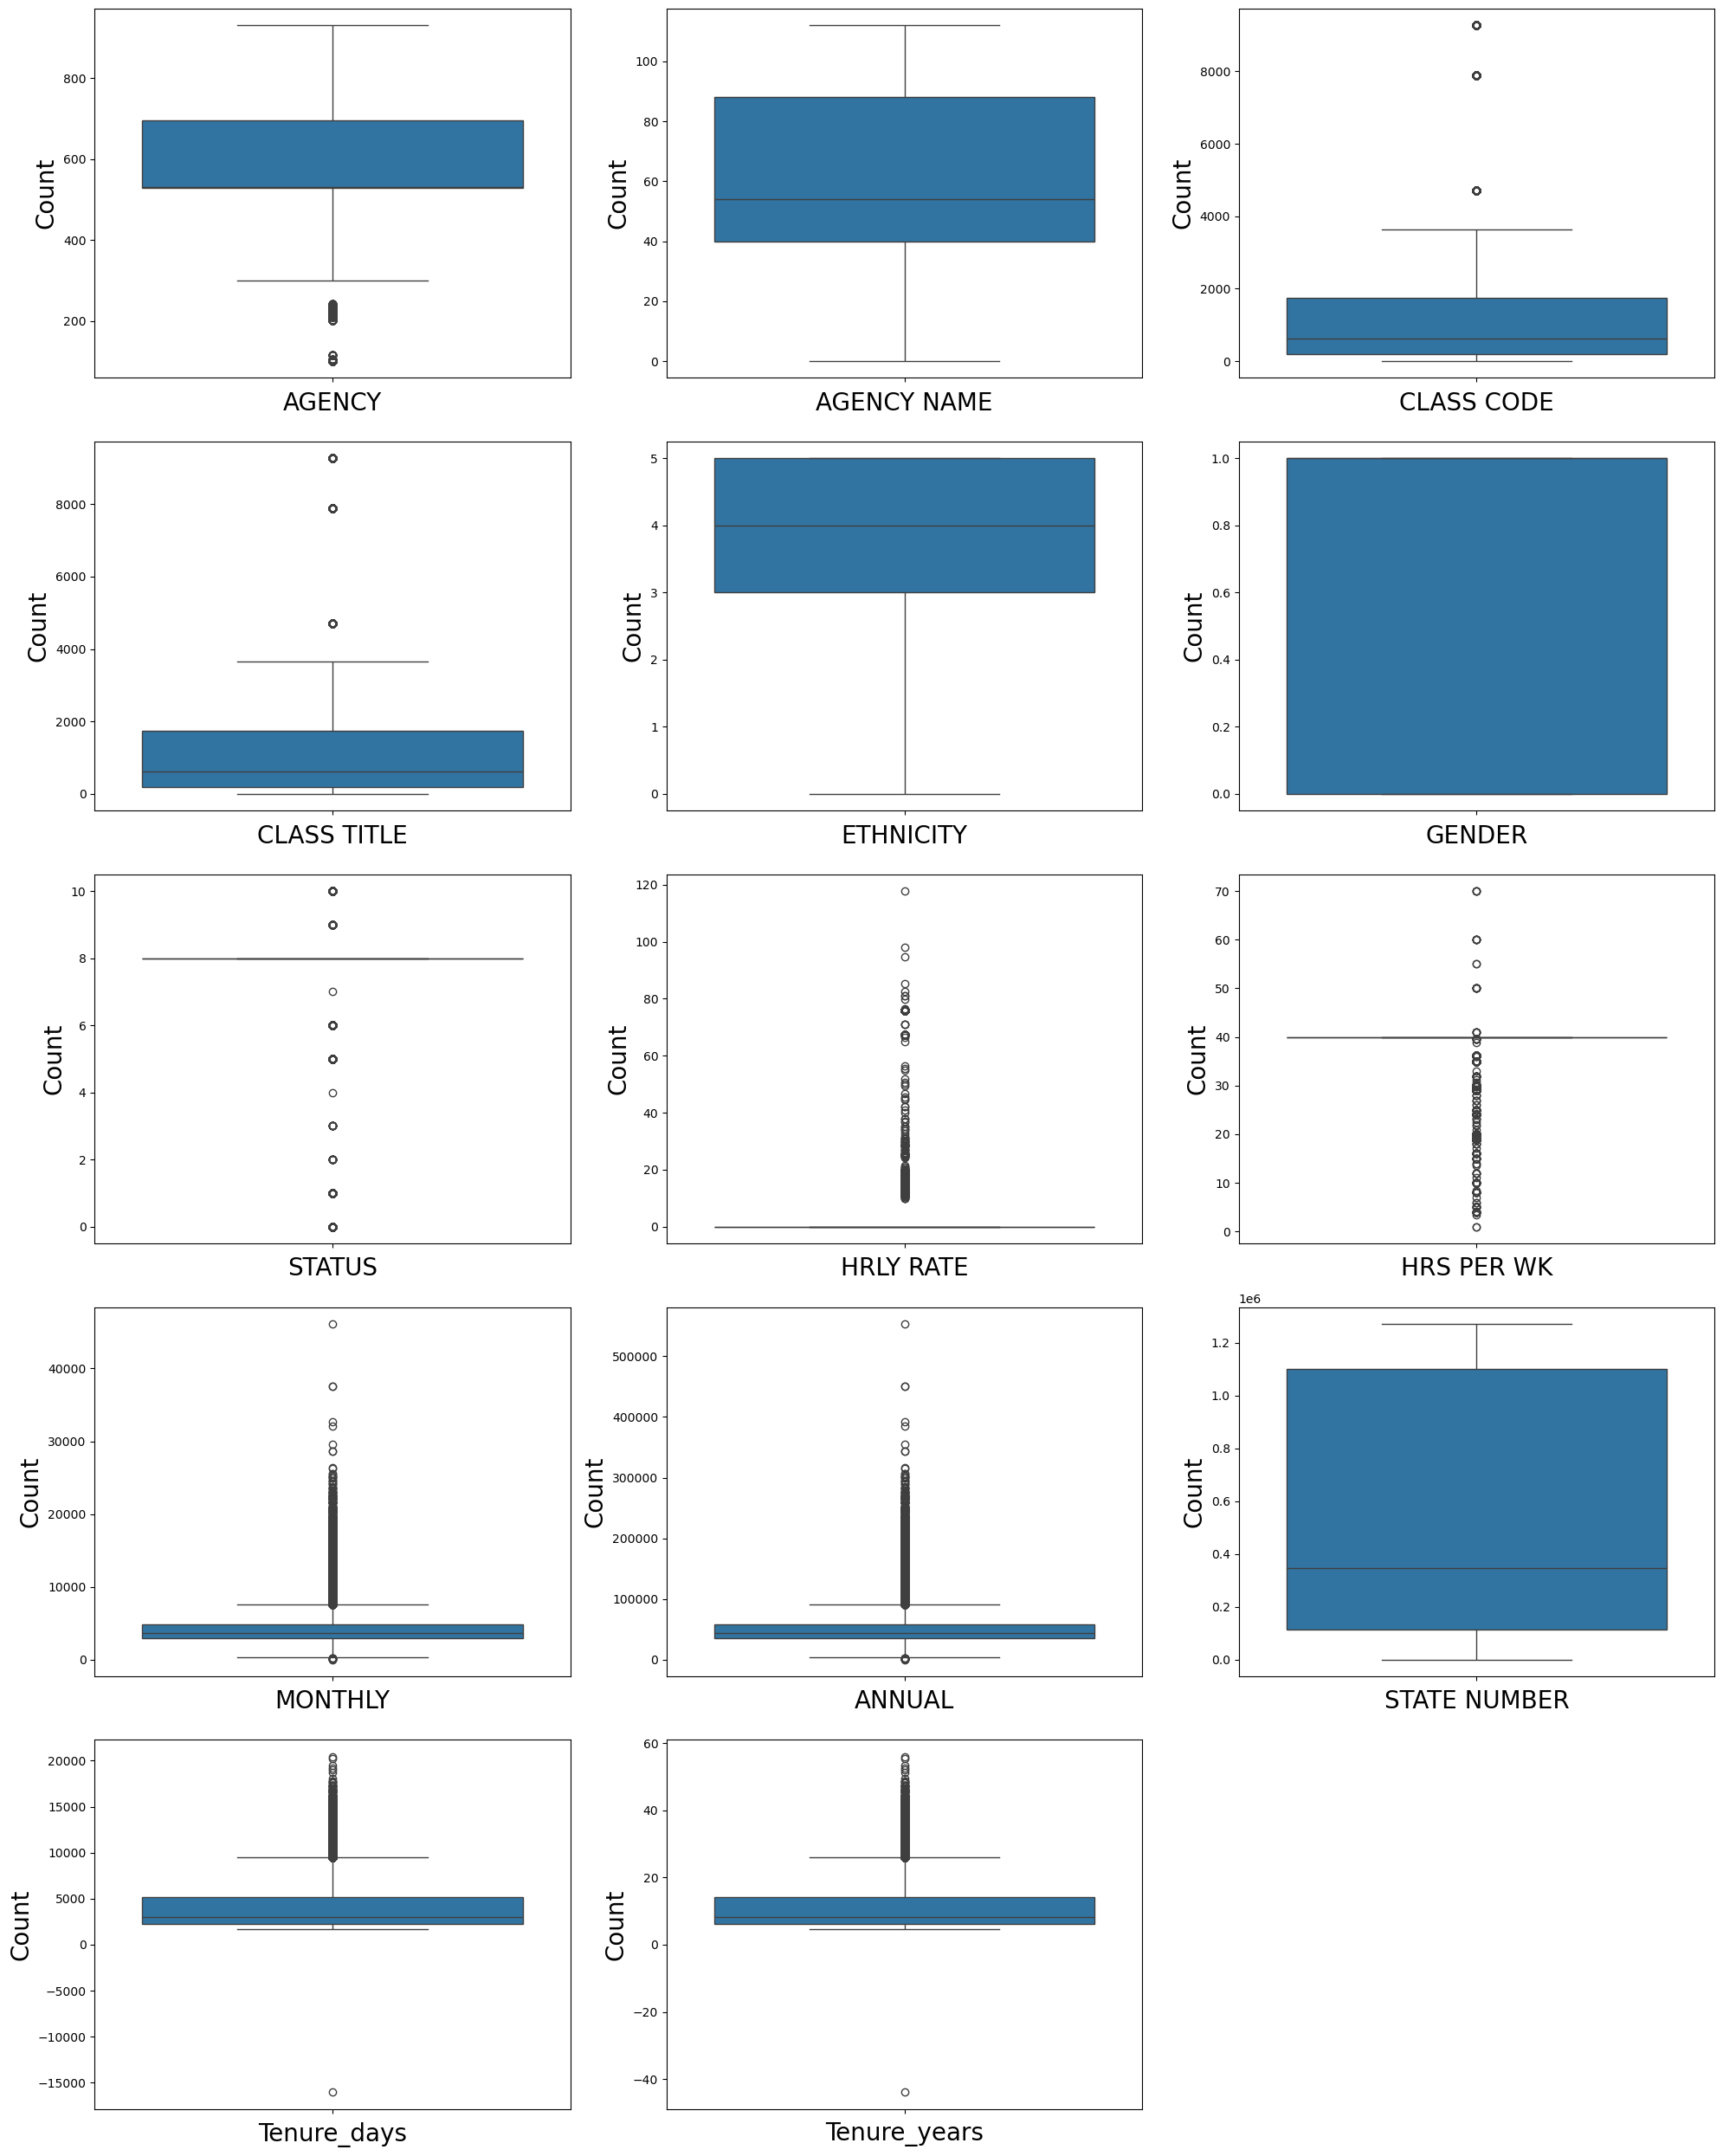

In [61]:
plt.figure(figsize=(20,25))

plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

### 5. Outlier Handling

#### Creating a function that calculates the IQR and then filters out the outliers.


In [64]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = data[column].median() 
    data[column] = data[column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x) 
    return sns.boxplot(x=column,data=data)

In [65]:
#### 1.AGENCY

<Axes: xlabel='AGENCY'>

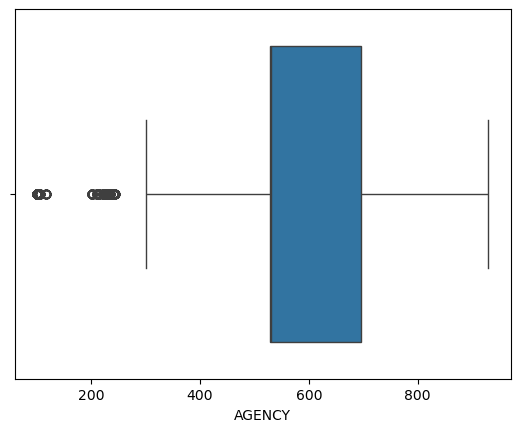

In [66]:
sns.boxplot(x='AGENCY',data=data)

<Axes: xlabel='AGENCY'>

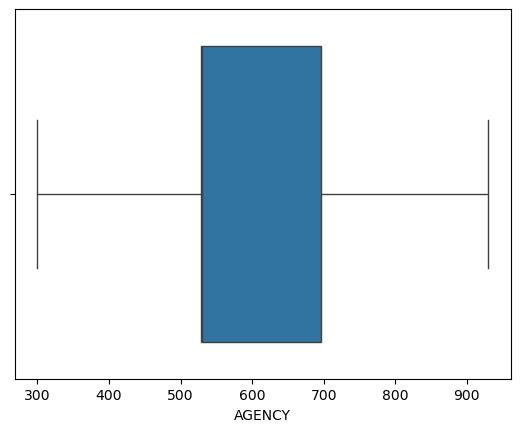

In [67]:
remove_outliers(data,'AGENCY')

In [68]:
#### 2.CLASS CODE

<Axes: xlabel='CLASS CODE'>

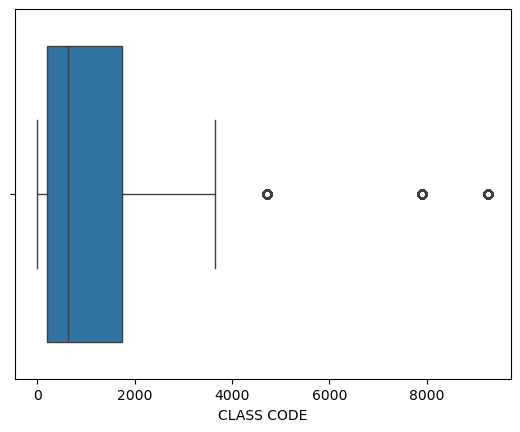

In [69]:
sns.boxplot(x='CLASS CODE',data=data)

<Axes: xlabel='CLASS CODE'>

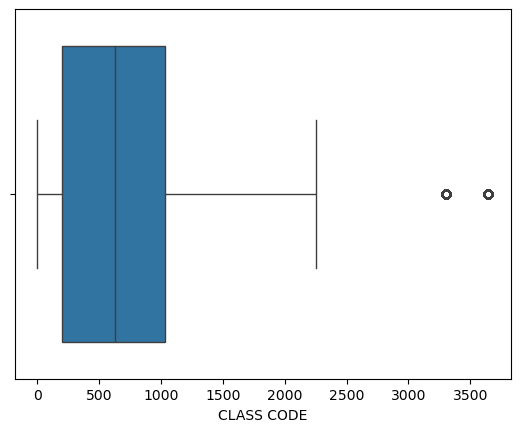

In [70]:
remove_outliers(data,'CLASS CODE')

<Axes: xlabel='CLASS CODE'>

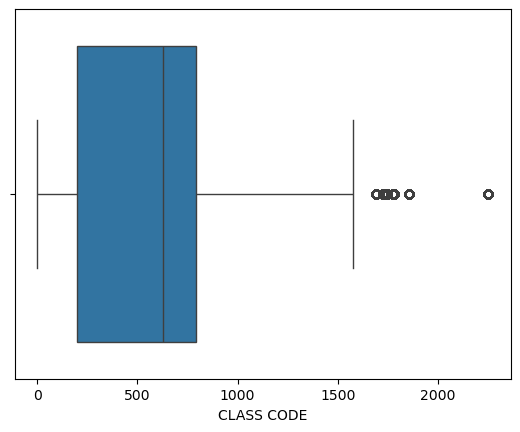

In [71]:
remove_outliers(data,'CLASS CODE')

In [72]:
#### 3.CLASS TITLE

<Axes: xlabel='CLASS TITLE'>

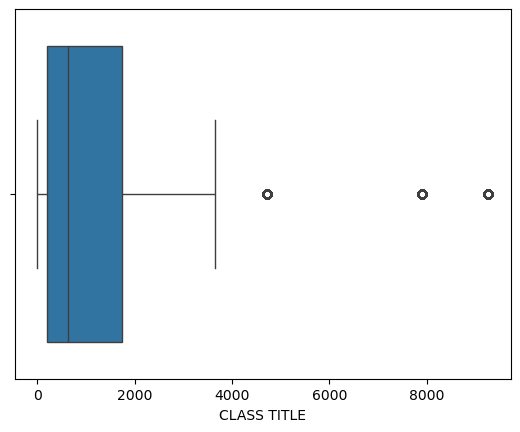

In [73]:
sns.boxplot(x='CLASS TITLE',data=data)

<Axes: xlabel='CLASS TITLE'>

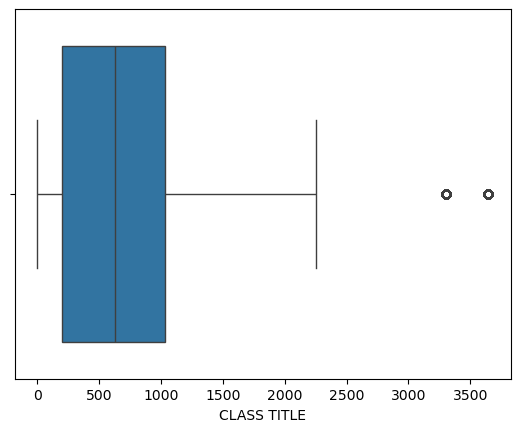

In [74]:
remove_outliers(data,'CLASS TITLE')

<Axes: xlabel='CLASS TITLE'>

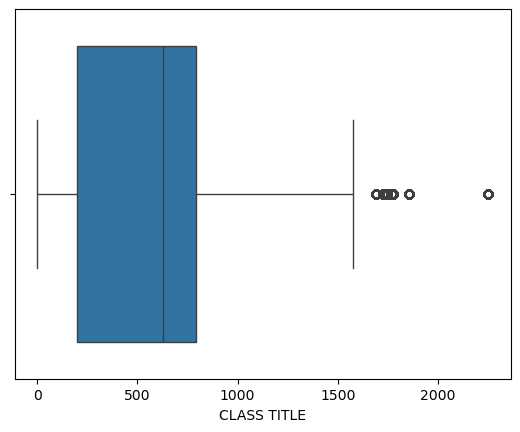

In [75]:
remove_outliers(data,'CLASS TITLE')

In [76]:
#### 4.STATUS

<Axes: xlabel='STATUS'>

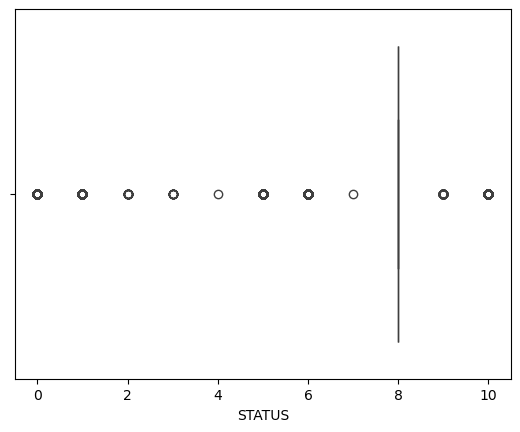

In [77]:
sns.boxplot(x='STATUS',data=data)

<Axes: xlabel='STATUS'>

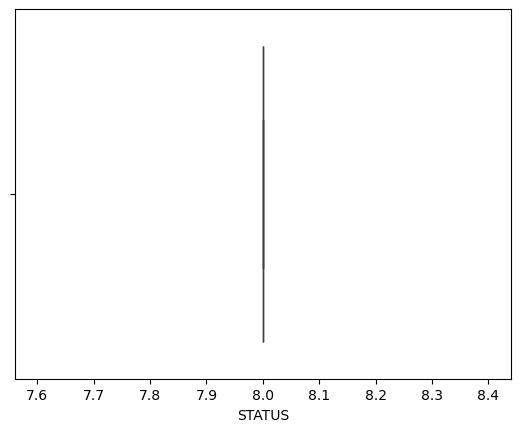

In [78]:
remove_outliers(data,'STATUS')

In [79]:
#### 5.HRLY RATE

<Axes: xlabel='HRLY RATE'>

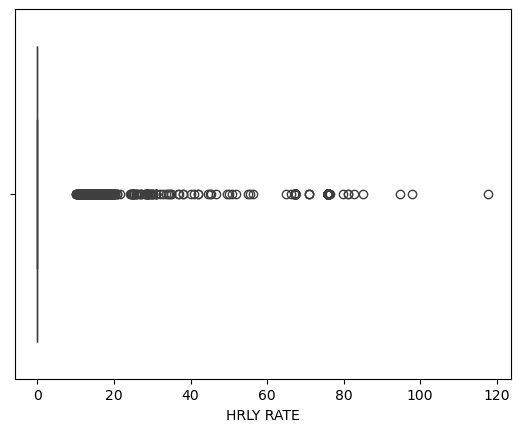

In [80]:
sns.boxplot(x='HRLY RATE',data=data)

<Axes: xlabel='HRLY RATE'>

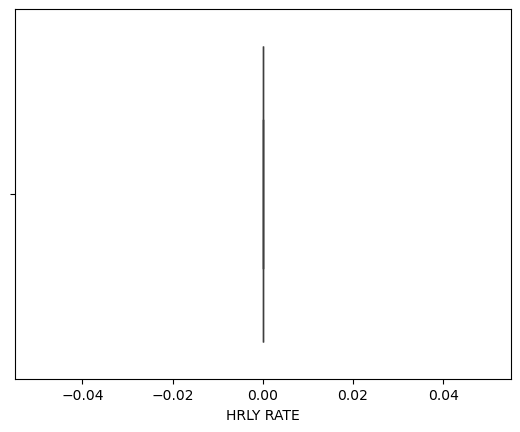

In [81]:
remove_outliers(data,'HRLY RATE')

In [82]:
#### 6.HRS PER WK

<Axes: xlabel='HRS PER WK'>

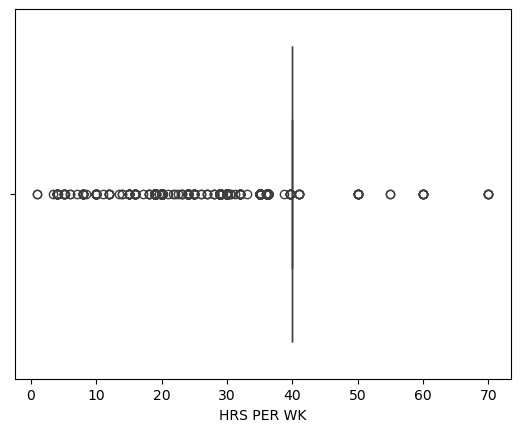

In [83]:
sns.boxplot(x='HRS PER WK',data=data)

<Axes: xlabel='HRS PER WK'>

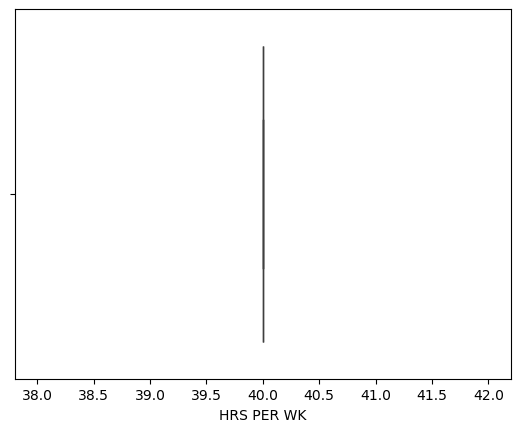

In [84]:
remove_outliers(data,'HRS PER WK')

In [85]:
#### 7.MONTHLY

<Axes: xlabel='MONTHLY'>

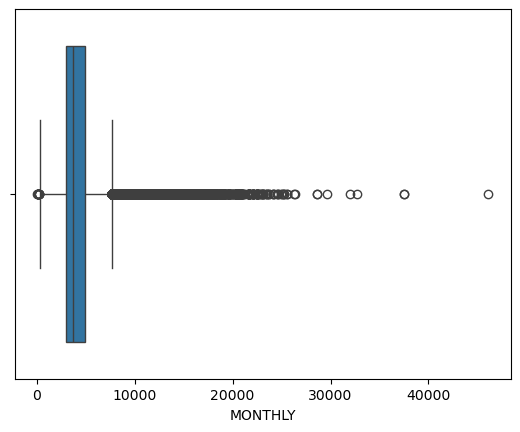

In [86]:
sns.boxplot(x='MONTHLY',data=data)

<Axes: xlabel='MONTHLY'>

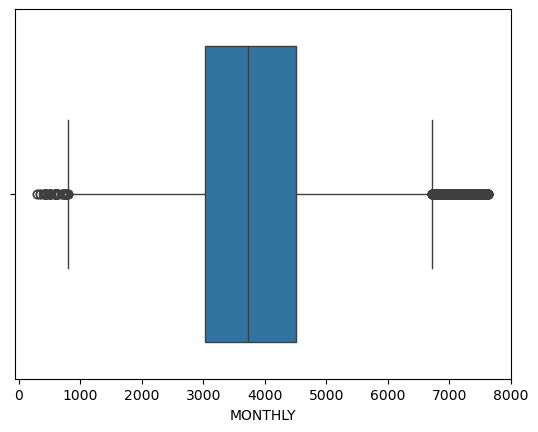

In [87]:
remove_outliers(data,'MONTHLY')

<Axes: xlabel='MONTHLY'>

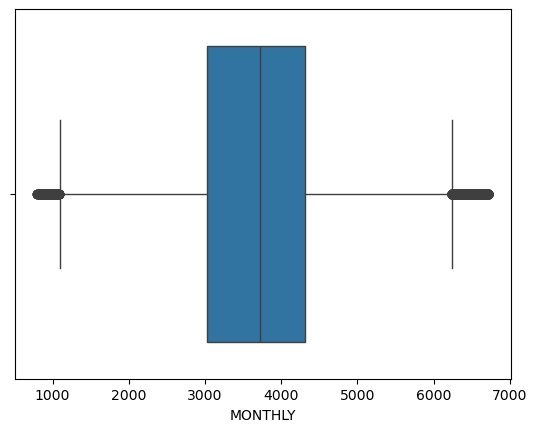

In [88]:
remove_outliers(data,'MONTHLY')

In [89]:
#### 8. Tenure_days

<Axes: xlabel='Tenure_days'>

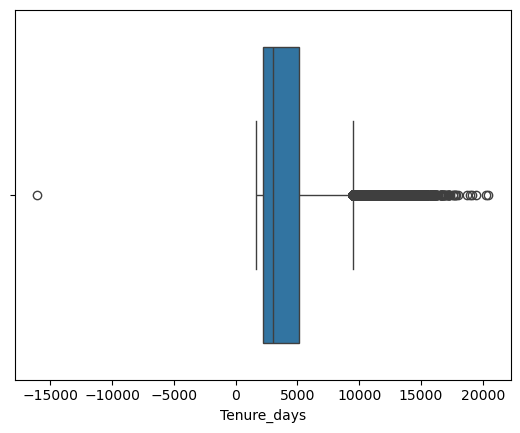

In [90]:
sns.boxplot(x='Tenure_days',data=data)

<Axes: xlabel='Tenure_days'>

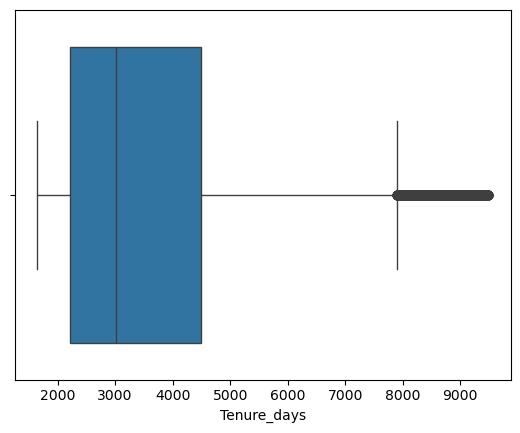

In [91]:
remove_outliers(data,'Tenure_days')

In [92]:
#### 9. Tenure_years

<Axes: xlabel='Tenure_years'>

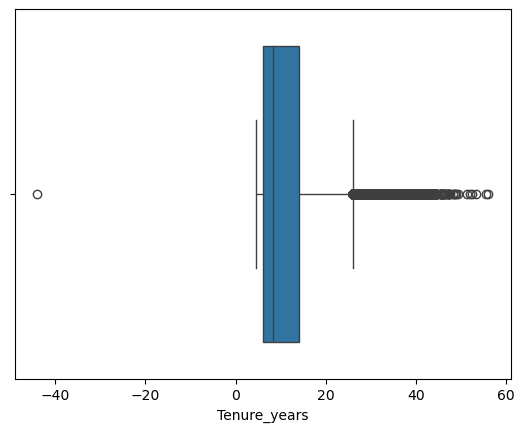

In [93]:
sns.boxplot(x='Tenure_years',data=data)

<Axes: xlabel='Tenure_years'>

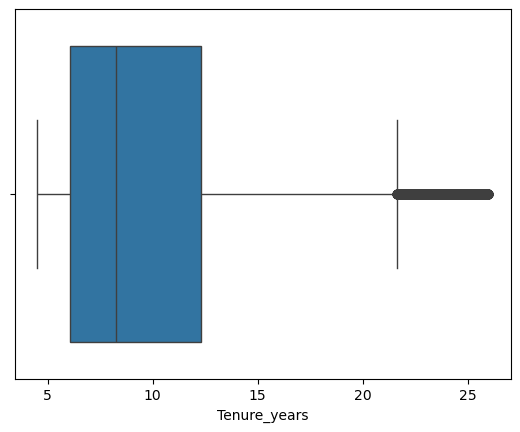

In [94]:
remove_outliers(data,'Tenure_years')

### 6. Feature Selection

In [96]:
#Pearson Correlation 
pearson_corr = data.corr(method='pearson') 
print("Pearson Correlation:") 
print(pearson_corr['ANNUAL'])

Pearson Correlation:
AGENCY         -0.210703
AGENCY NAME    -0.085757
CLASS CODE     -0.212581
CLASS TITLE    -0.212191
ETHNICITY       0.099990
GENDER         -0.129265
STATUS               NaN
HRLY RATE            NaN
HRS PER WK           NaN
MONTHLY         0.519944
ANNUAL          1.000000
STATE NUMBER   -0.265438
Tenure_days     0.230630
Tenure_years    0.230630
Name: ANNUAL, dtype: float64


The correlation between these features (STATUS, HRLY RATE, HRS PER WK) and the target variable is NaN, it indicates that there is no linear relationship. This means these features don't provide any useful information for predicting the target variable (salary)

In [98]:
# Drop the columns with NaN correlation
data.drop(['STATUS', 'HRLY RATE', 'HRS PER WK'], axis=1, inplace=True)

<Axes: >

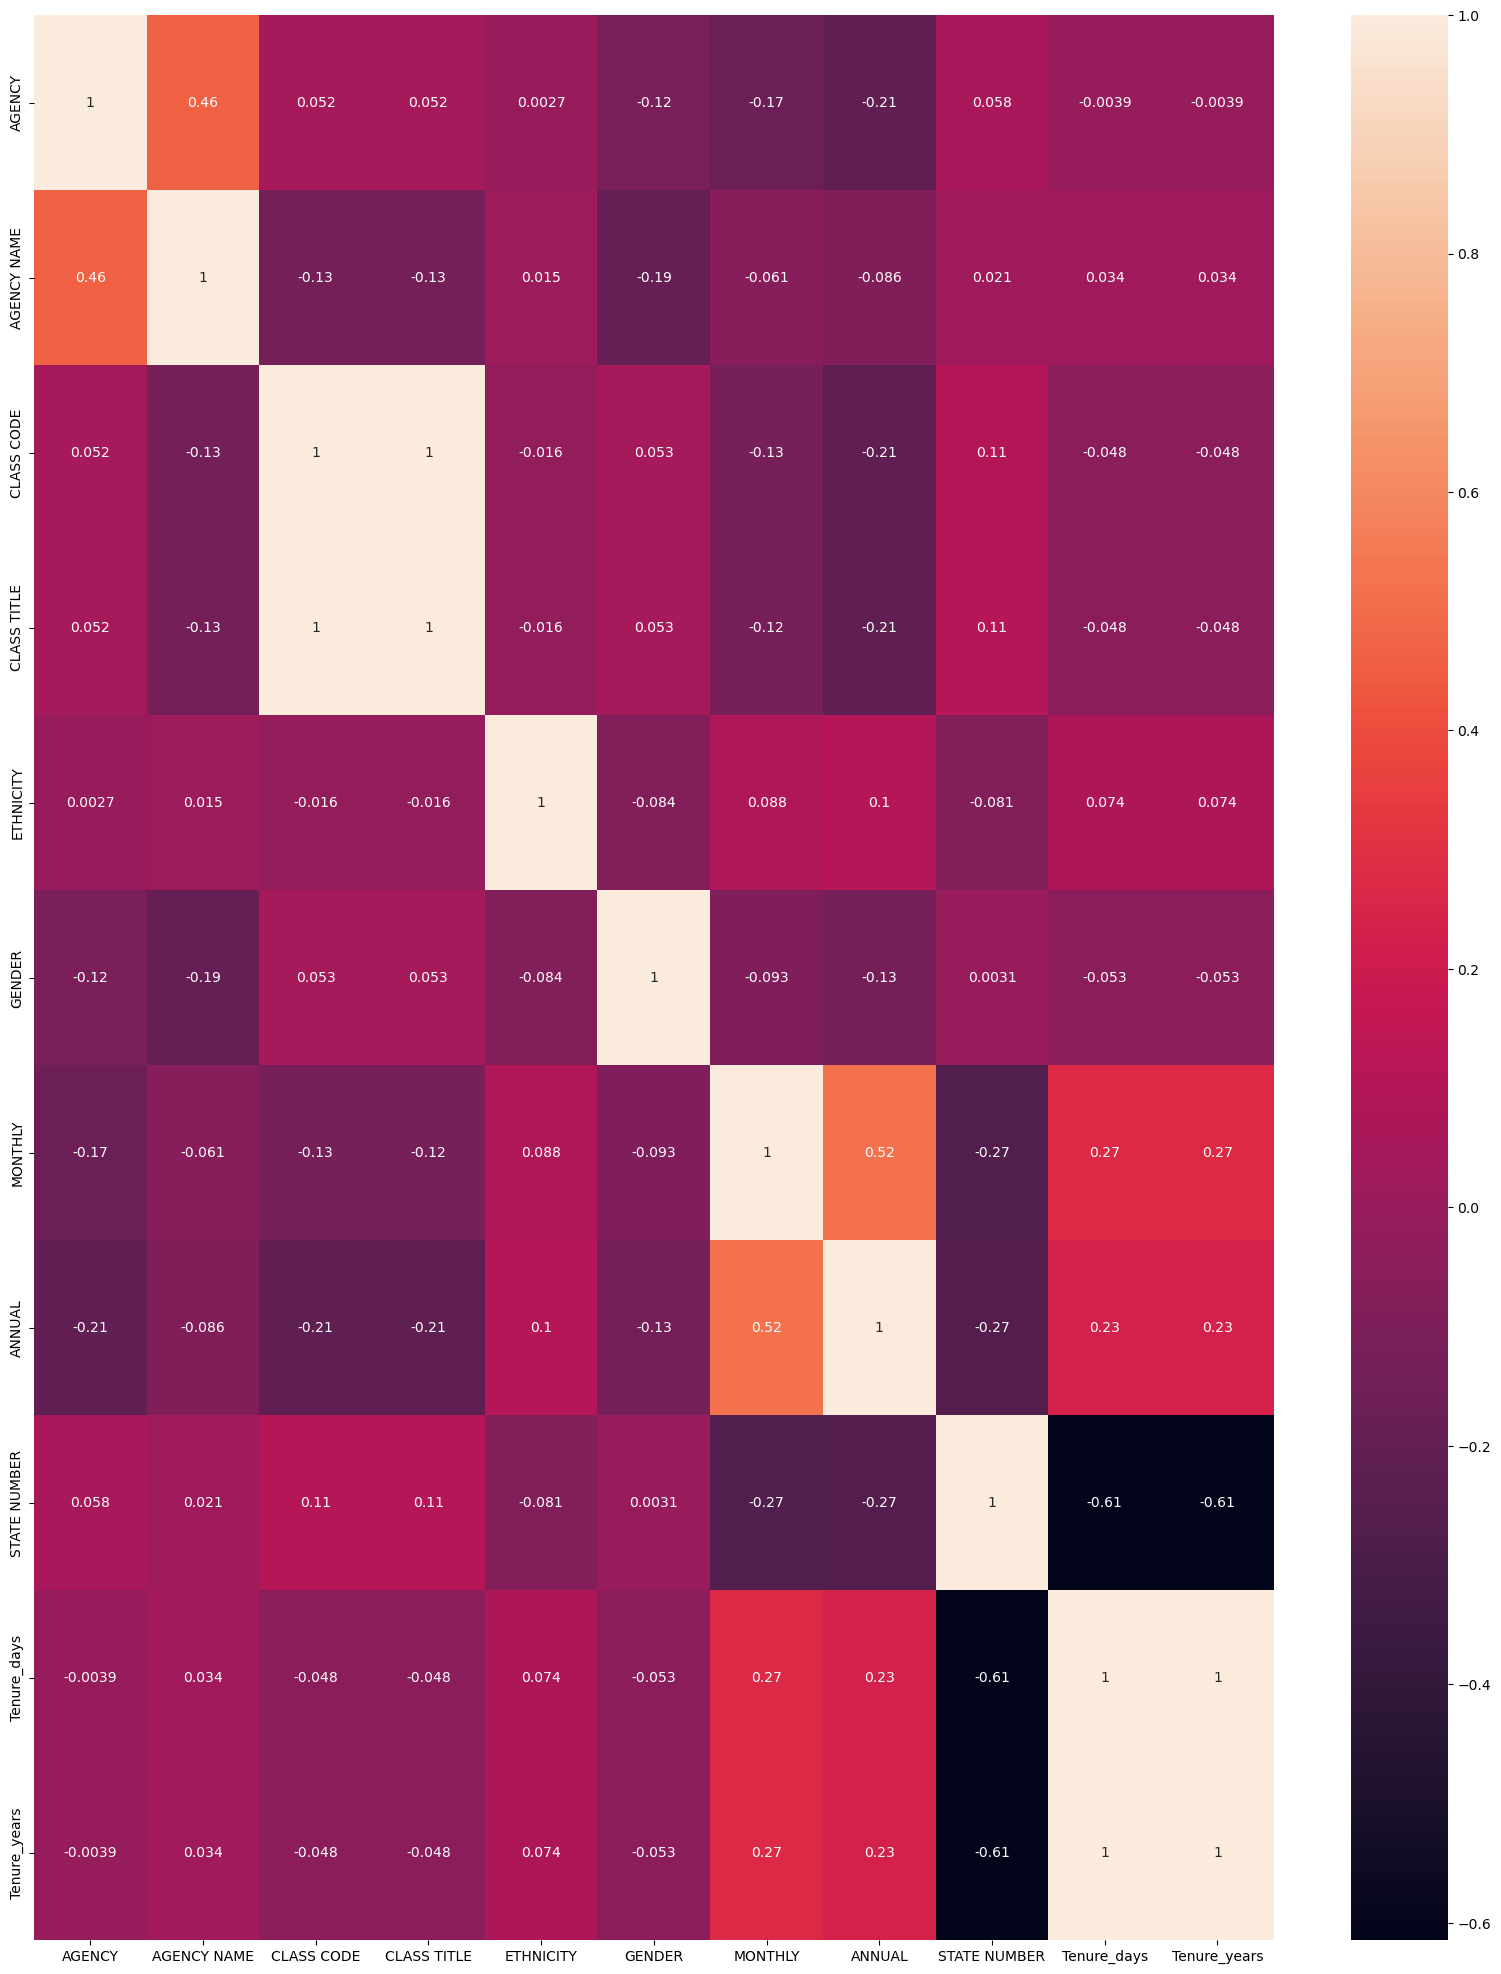

In [99]:
plt.figure(figsize=(20,25))
sns.heatmap(data.corr(), annot=True)

Since CLASS CODE and CLASS TITLE are highly correlated, they both carry similar information. Keeping both can lead to redundancy and inflated variances of the coefficient estimates. By removing CLASS CODE, we reduce redundancy, avoid potential overfitting, and simplify the model, making it more stable and easier to interpret.

In [101]:
# Drop the CLASS CODE
data.drop(['CLASS CODE'], axis=1, inplace=True)

### 8. Model Development

#### The following machine learning models were implemented to predict Salaries :
#### 1. Linear Regression
#### 2. Decision Tree Regressor
#### 3. Random Forest Regressor
#### 4. Bagging Regressor
#### 5. Gradient Boosting Regressor
#### 6. XGBoost Regressor
#### 7. Polynomial Regression
#### 8. Ridge Regression
#### 9. Lasso Regression
#### 10. K-Nearest Neighbors

### Model Performance Evaluation

In evaluating the performance of predictive models, several metrics are commonly used to assess the accuracy and effectiveness of the predictions. Here are the explanations for each metric:

### 1. R-Squared (R²) Score
The R² score, also known as the coefficient of determination, measures the proportion of variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where:
- **1** indicates that the model explains all the variability of the target variable.
- **0** indicates that the model explains none of the variability.

Formula:
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$
where \( SS_{res} \) is the sum of squares of residuals and \( SS_{tot} \) is the total sum of squares.

### 2. Mean Squared Error (MSE)
MSE measures the average squared difference between the observed actual outcomes and the predictions. It provides a way to quantify the error of a model.
- **Lower MSE values** indicate better model performance.

Formula: $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$
where \( y_i \) is the actual value and \( \hat{y}_i \) is the predicted value.

### 3. Root Mean Squared Error (RMSE)
RMSE is the square root of MSE and represents the standard deviation of the residuals (prediction errors). It provides a measure of how spread out the errors are.
- **Lower RMSE values** indicate better model performance.

Formula: $$ RMSE = \sqrt{MSE} $$

### 4. Mean Absolute Error (MAE)
MAE measures the average absolute difference between the observed actual outcomes and the predictions. It gives an idea of how much the predictions deviate from the actual values on average.
- **Lower MAE values** indicate better model performance.

Formula:
$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $$



### Interpretation
- **R² Score:** Closer to 1 indicates better model fit.
- **MSE, RMSE, MAE:** Lower values indicate better model performance. Each metric provides a different perspective on the errors, with RMSE being more sensitive to larger errors due to the squaring process.

Including these metrics in thesis will help demonstrate the accuracy and effectiveness of your predictive model, providing a comprehensive evaluation of its performance.

 

In [103]:
np.random.seed(42)

### Split input features and output into X and y

In [105]:
X=data.drop('ANNUAL', axis=1)     #independent variable
y=data.ANNUAL       #dependent variable

### Split the X and y for training and testing (X_train, y_train, X_test, y_test)


In [107]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [108]:
# Model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error

### 1. Linear Regression

 
### 1. Linear Regression
Linear Regression is the simplest form of regression that models the relationship between the dependent variable and one or more independent variables by fitting a linear equation to observed data.
- **Equation:**
  𝑦=𝛽0+𝛽1𝑥1+𝛽2𝑥2+⋯+𝛽𝑛𝑥𝑛
- **Use Case:** Predicting numerical values, like housing prices or salaries.
- **Advantages:** Easy to implement and interpret, works well with linearly separable data.
- **Disadvantages:** Prone to underfitting and sensitive to outliers.

  
 

In [110]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression

LinearRegression()

In [111]:
y_pred1=LR.predict(X_test)

In [112]:
y_train_pred1=LR.predict(X_train)

#### Accuracy Of test data

In [114]:
r1=r2_score(y_test,y_pred1)
r1

0.3242726853359581

In [115]:
mse1=mean_squared_error(y_test,y_pred1)
mse1

434020837.8092554

In [116]:
rmse1=root_mean_squared_error(y_test,y_pred1)
rmse1

20833.166773422985

In [117]:
mea1=mean_absolute_error(y_test,y_pred1)
mea1

10905.5649875282

#### Accuracy of Training data

In [119]:
r_1=r2_score(y_train,y_train_pred1)
r_1

0.33557747521394643

###  2. Decision Tree Regressor


A Decision Tree Regressor splits the data into subsets based on the feature values, creating a tree-like model of decisions.
- **Algorithm:** Recursive binary splitting.
- **Use Case:** Non-linear relationships, interpretability.
- **Advantages:** Simple to understand and interpret, handles both numerical and categorical data.
- **Disadvantages:** Prone to overfitting, sensitive to small data variations.

In [121]:
from sklearn.tree import DecisionTreeRegressor  #importing decision tree from sklearn.tree
dt=DecisionTreeRegressor(random_state=42)      #object creation for decision tree  
dt.fit(X_train,y_train)     #training the model 

DecisionTreeRegressor(random_state=42)

In [122]:
y_pred2=dt.predict(X_test)

In [123]:
y_train_pred2=dt.predict(X_train)

#### Accuracy of testing data


In [125]:
r2=r2_score(y_test,y_pred2)
r2

0.9129811214048372

In [126]:
mse2=mean_squared_error(y_test,y_pred2)
mse2

55892378.143499985

In [127]:
rmse2=root_mean_squared_error(y_test,y_pred2)
rmse2

7476.1205276199225

In [128]:
mea2=mean_absolute_error(y_test,y_pred2)
mea2

1047.1204465627486

#### Accuracy of training data

In [130]:
r_2=r2_score(y_train,y_train_pred2)
r_2

0.9999999999999994

### 3. Random Forest Regressor


Random Forest Regressor is an ensemble method that uses multiple decision trees to improve predictive performance.
- **Algorithm:** Bootstrap aggregating (bagging) with decision trees.
- **Use Case:** Handling non-linear relationships and reducing overfitting.
- **Advantages:** Reduces overfitting, handles large datasets well.
- **Disadvantages:** Less interpretable than single decision trees, computationally intensive.

In [132]:
from sklearn.ensemble import RandomForestRegressor #importing randomforest

rf_reg = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=1) #object creation ,taking 100 decision tree in random forest 
rf_reg.fit(X_train,y_train)  #training the data

RandomForestRegressor(n_jobs=1, random_state=42)

In [133]:
y_pred3=rf_reg.predict(X_test)

In [134]:
y_train_pred3 = rf_reg.predict(X_train)

#### Accuracy of testing data

In [136]:
r3=r2_score(y_test,y_pred3)
r3

0.9401737513716608

In [137]:
mse3=mean_squared_error(y_test,y_pred3)
mse3

38426504.285336286

In [138]:
rmse3=root_mean_squared_error(y_test,y_pred3)
rmse3

6198.911540370316

In [139]:
mea3=mean_absolute_error(y_test,y_pred3)
mea3

911.4905750367578

#### Accuracy of Training data

In [141]:
r_3=r2_score(y_train,y_train_pred3)
r_3

0.9931207520625285

### 4. Bagging Regressor


Bagging Regressor is an ensemble method that combines predictions from multiple models to improve accuracy and stability.
- **Algorithm:** Bootstrap aggregating with any base regressor (often decision trees).
- **Use Case:** Improving stability and accuracy of models.
- **Advantages:** Reduces variance and overfitting, robust to outliers.
- **Disadvantages:** Computationally expensive, loss of model interpretability.

In [143]:
from sklearn.ensemble import BaggingRegressor

# Create a Bagging Classifier
bagging_reg = BaggingRegressor(random_state=42,n_jobs=1)

# Train the classifier
bagging_reg.fit(X_train, y_train)

BaggingRegressor(n_jobs=1, random_state=42)

In [144]:
y_pred4=bagging_reg.predict(X_test)

In [145]:
y_train_pred4=bagging_reg.predict(X_train)

#### Accuracy of testing data

In [147]:
r4=r2_score(y_test,y_pred4)
r4

0.93591809086286

In [148]:
mse4=mean_squared_error(y_test,y_pred4)
mse4

41159922.48433243

In [149]:
rmse4=root_mean_squared_error(y_test,y_pred4)
rmse4

6415.5999317548185

In [150]:
mea4=mean_absolute_error(y_test,y_pred4)
mea4

955.780566561181

#### Accuracy of Training data


In [152]:
r_4=r2_score(y_train,y_train_pred4)
r_4

0.9900046456361694

### 5. Gradient Boosting Regressor

Gradient Boosting Regressor builds models sequentially, each correcting the errors of the previous one.
- **Algorithm:** Boosting with gradient descent.
- **Use Case:** High predictive accuracy for complex datasets.
- **Advantages:** High accuracy, handles different types of data.
- **Disadvantages:** Prone to overfitting, sensitive to outliers, requires careful tuning.

In [154]:
## importing the model library
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor(random_state=42)  ## object creation
gbm.fit(X_train,y_train)       ## fitting the data

GradientBoostingRegressor(random_state=42)

In [155]:
y_pred5=gbm.predict(X_test)

In [156]:
y_train_pred5=gbm.predict(X_train)

#### Accuracy of testing data

In [158]:
r5=r2_score(y_test,y_pred5)
r5

0.8435332197548125

In [159]:
mse5=mean_squared_error(y_test,y_pred5)
mse5

100498887.01790354

In [160]:
rmse5=root_mean_squared_error(y_test,y_pred5)
rmse5

10024.913317226416

In [161]:
mea5=mean_absolute_error(y_test,y_pred5)
mea5

2848.566109162276

#### Accuracy of training data

In [163]:
r_5=r2_score(y_train,y_train_pred5)
r_5

0.8611353633427121

### 6. XGBoost Regressor

 
XGBoost Regressor is an optimized version of Gradient Boosting that provides better performance through regularization and parallel processing.
- **Algorithm:** Gradient boosting with regularization.
- **Use Case:** Competitive machine learning tasks, high accuracy.
- **Advantages:** Efficient, highly accurate, handles missing values well.
- **Disadvantages:** Requires careful parameter tuning, complex.

In [165]:
## model creation
from xgboost import XGBRegressor#importing the model library
xgb_r=XGBRegressor(random_state=42,n_jobs=1) ## object creation
xgb_r.fit(X_train,y_train)# fitting the data

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [166]:
y_pred6=xgb_r.predict(X_test) 

In [167]:
y_train_pred6 = xgb_r.predict(X_train)

#### Accuracy of testing data

In [169]:
r6=r2_score(y_test,y_pred6)
r6

0.9360605686348682

In [170]:
mse6=mean_squared_error(y_test,y_pred6)
mse6

41068408.7618082

In [171]:
rmse6=root_mean_squared_error(y_test,y_pred6)
rmse6

6408.463837910627

In [172]:
mea6=mean_absolute_error(y_test,y_pred6)
mea6

1275.9712674172208

#### Accuracy of training data

In [174]:
r_6=r2_score(y_train,y_train_pred6)
r_6

0.970476592511092

### 7. Polynomial Regression


Polynomial Regression models the relationship between the dependent variable and the independent variables as an nth degree polynomial.
- **Use Case:** Capturing non-linear relationships.
- **Advantages:** Fits non-linear data, easy to understand.
- **Disadvantages:** Prone to overfitting, especially with high-degree polynomials.

In [176]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model1 = LinearRegression()
model1.fit(X_poly, y_train)

LinearRegression()

In [177]:
y_pred7 = model1.predict(poly.transform(X_test))

In [178]:
y_train_pred7 = model1.predict(poly.transform(X_train))

#### Accuracy of testing data


In [180]:
r7=r2_score(y_test,y_pred7)
r7

0.3937717217746506

In [219]:
rmse7=root_mean_squared_error(y_test,y_pred7)
rmse7

19732.75158133105

### 8. Ridge Regression


Ridge Regression (L2 Regularization) adds a penalty to the loss function to shrink the coefficients and prevent overfitting.

- **Use Case:** Linear models with multicollinearity.
- **Advantages:** Reduces overfitting, handles multicollinearity.
- **Disadvantages:** Requires tuning of the regularization parameter \(\lambda\).

In [182]:
from sklearn.linear_model import Ridge

# Create Ridge Regression model
ridge = Ridge(alpha=1.0)

# Fit the model on the training data
ridge.fit(X_train, y_train)

Ridge()

In [183]:
y_pred8=ridge.predict(X_test)

In [184]:
y_train_pred8=ridge.predict(X_train)

#### Accuracy of tesing data

In [186]:
r8=r2_score(y_test,y_pred8)
r8

0.32427271712895533

In [187]:
mse8=mean_squared_error(y_test,y_pred8)
mse8

434020817.3885576

In [188]:
rmse8=root_mean_squared_error(y_test,y_pred8)
rmse8

20833.166283322313

In [189]:
mea8=mean_absolute_error(y_test,y_pred8)
mea8

10905.553407048239

#### Accuracy of training data

In [191]:
r_8=r2_score(y_test,y_pred8)
r_8

0.32427271712895533

### 9. Lasso Regression


Lasso Regression (L1 Regularization) adds a penalty to the loss function to enforce sparsity, shrinking coefficients to zero.

- **Use Case:** Feature selection, linear models.
- **Advantages:** Reduces overfitting, performs feature selection.
- **Disadvantages:** Requires tuning of the regularization parameter \(\lambda\).

In [193]:
from sklearn.linear_model import Lasso

# Create Lasso Regression model
lasso = Lasso(alpha=0.1)

# Fit the model on the training data
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [194]:
y_pred9=lasso.predict(X_test)

In [195]:
y_train_pred10=lasso.predict(X_train)

#### Accuracy of tesing data

In [197]:
r9=r2_score(y_test,y_pred8)
r9

0.32427271712895533

In [198]:
mse9=mean_squared_error(y_test,y_pred9)
mse9

434020758.1480842

In [199]:
rmse9=root_mean_squared_error(y_test,y_pred9)
rmse9

20833.164861539502

In [200]:
mea9=mean_absolute_error(y_test,y_pred9)
mea9

10905.533087622915

#### Accuracy of training data

In [202]:
r_9=r2_score(y_test,y_pred9)
r_9

0.3242728093604855

### 10 . KNN


KNN Regressor predicts the target value by averaging the values of the k-nearest neighbors.
- **Algorithm:** Lazy learning, instance-based learning.
- **Use Case:** Non-linear relationships, simple implementation.
- **Advantages:** Simple, non-parametric, makes no assumptions about data distribution.
- **Disadvantages:** Computationally intensive, sensitive to the choice of k and distance metric.

In [204]:
from sklearn.neighbors import KNeighborsRegressor

# Create KNN Regressor model
knn = KNeighborsRegressor(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [205]:
y_pred10=knn.predict(X_test)

In [206]:
y_train_pred10=knn.predict(X_train)

#### Accuracy of tesing data

In [208]:
r10=r2_score(y_test,y_pred10)
r10

0.35633161182362083

In [209]:
mse10=mean_squared_error(y_test,y_pred10)
mse10

413429333.17197645

In [210]:
rmse10=root_mean_squared_error(y_test,y_pred10)
rmse10

20332.96174127066

In [211]:
mea10=mean_absolute_error(y_test,y_pred10)
mea10

8131.236398300833

#### Accuracy of training data

In [213]:
r_10=r2_score(y_test,y_pred10)
r_10

0.35633161182362083

### Final Conclusion

In [221]:
model_name= ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor','Bagging Regressor','Boosting Regressor','XGBoost Regressor','Polynomial Regression','Ridge Regression','Lasso Regression','K-Nearest Neighbor'] 
r2_score= [r1,r2,r3,r4,r5,r6,r7,r8,r9,r10]
Root_Mean_Squared_Error = [rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7,rmse8,rmse9,rmse10]

dict={'Model Name':model_name , 'R2 Score':r2_score, 'Root Mean Squared Error':Root_Mean_Squared_Error}

In [225]:
df=pd.DataFrame(dict)
df

,Model Name,R2 Score,Root Mean Squared Error
0,Linear Regression,0.324273,20833.166773
1,Decision Tree Regressor,0.912981,7476.120528
2,Random Forest Regressor,0.940174,6198.911540
3,Bagging Regressor,0.935918,6415.599932
4,Boosting Regressor,0.843533,10024.913317
5,XGBoost Regressor,0.936061,6408.463838
6,Polynomial Regression,0.393772,19732.751581
7,Ridge Regression,0.324273,20833.166283
8,Lasso Regression,0.324273,20833.164862
9,K-Nearest Neighbor,0.356332,20332.961741


### Key Insights

1. **Random Forest Regressor**: Achieves the highest R2 score (0.940174) and the lowest RMSE (6198.911540), indicating it is the most effective model for this dataset.
   
2. **Bagging Regressor and XGBoost Regressor**: Both models also show strong performance, with high R2 scores (0.935918 and 0.936061, respectively) and low RMSE values (6415.599932 and 6408.463838, respectively).

3. **Decision Tree Regressor**: While it performs well with a high R2 score (0.912981), its RMSE (7476.120528) is slightly higher than the top models.

4. **Boosting Regressor**: This model has a relatively good performance with an R2 score of 0.843533 but has a higher RMSE (10024.913317) compared to Random Forest, Bagging, and XGBoost.

5. **Linear, Ridge, and Lasso Regression**: These models demonstrate similar performance with relatively low R2 scores (around 0.324273) and high RMSE values (above 20833), indicating they are not very effective for this dataset.

6. **K-Nearest Neighbor and Polynomial Regression**: These models also show suboptimal performance with lower R2 scores (0.356332 and 0.393772, respectively) and high RMSE values (20332.961741 and 19732.751581, respectively).

### Conclusion
For this dataset, the **Random Forest Regressor** is the best-performing model, closely followed by the **Bagging Regressor** and **XGBoost Regressor**. These models provide a good balance of high predictive accuracy and low prediction error. Models like Linear, Ridge, Lasso, K-Nearest Neighbor, and Polynomial Regression show less effectiveness in capturing the data's underlying patterns.

 

### Task 3:-
- 1.	Who are the outliers in the salaries?
- 2.	What departments/roles have the biggest wage disparities between managers and employees?
- 3. Have salaries and total compensations for some roles/ departments/ head-count changed over time?


### 1. Who are the outliers in the salaries?

In [3]:
df = pd.read_csv('salary.csv')
df.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


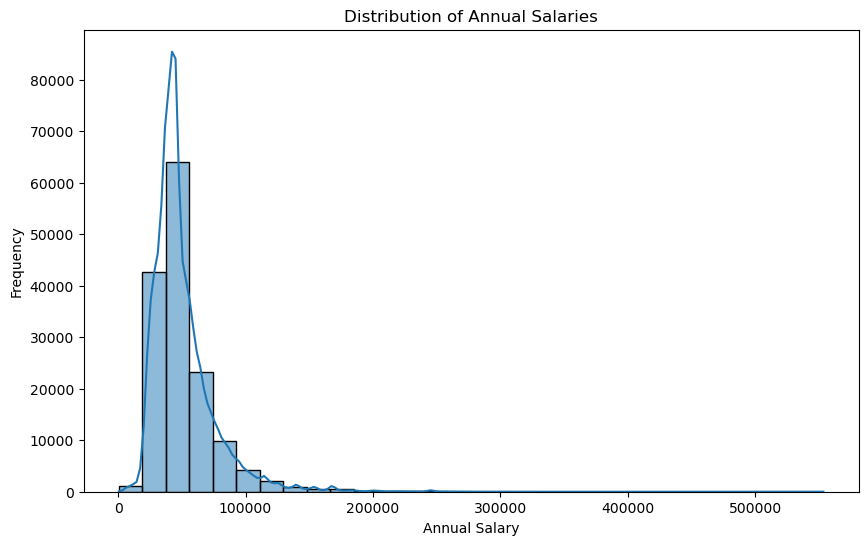

In [10]:
# Check the distribution of annual salaries. By examining the histogram of the ANNUAL salary data, 
# we gain insights into the overall distribution and identify any skewness or patterns in the data.

# Plot a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['ANNUAL'], bins=30, kde=True)
plt.title('Distribution of Annual Salaries')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Use the IQR method for skewed data # Since the histogram reveals that the salary data is right-skewed, the IQR (Interquartile Range) method is a more suitable choice for identifying outliers. # This method is less influenced by extreme values and provides a robust way to detect outliers in skewed distributions.


# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ANNUAL'].quantile(0.25)
Q3 = df['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['ANNUAL'] < lower_bound) | (df['ANNUAL'] > upper_bound)]
print("Outliers using IQR method:")
outliers_iqr[['AGENCY', 'LAST NAME', 'FIRST NAME', 'ANNUAL']]

Outliers using IQR method:


,AGENCY,LAST NAME,FIRST NAME,ANNUAL
0,241,RUCKER,MORTON,114549.84
2,241,SPECIA JR,JOHN,114549.84
5,302,ROGERS,SHAUNA,154788.00
7,510,SPINKS,DARREL,120000.00
36,101,BARNETT,ANNA,96000.00
...,...,...,...,...
149374,809,KOCH,MARGARET,127000.08
149393,809,MEDINA,JOE,100300.92
149401,809,NUNN,CHRISTOPHER,95000.04
149415,809,PROVINE,CYNTHIA,122257.08


### 2. What departments/roles have the biggest wage disparities between managers and employees?

In [7]:

# Define managerial and non-managerial keywords
managerial_keywords = ['Manager', 'Director', 'Chief', 'Head', 'Executive', 'Supervisor']
non_managerial_keywords = ['Assistant', 'Associate', 'Clerk', 'Technician', 'Officer']

# Initialize columns for categorization
df['Role Category'] = 'Employee'

# Categorize based on keywords
for keyword in managerial_keywords:
    df.loc[df['CLASS TITLE'].str.contains(keyword, case=False, na=False), 'Role Category'] = 'Manager'

# Output unique values in each category
unique_managers = df[df['Role Category'] == 'Manager']['CLASS TITLE'].unique()
unique_employees = df[df['Role Category'] == 'Employee']['CLASS TITLE'].unique()

In [24]:
# Calculate average annual salary for managers and employees
avg_manager_salary = df[df['Role Category'] == 'Manager']['ANNUAL'].mean()
avg_employee_salary = df[df['Role Category'] == 'Employee']['ANNUAL'].mean()

# Calculate wage disparity
wage_disparity = avg_manager_salary - avg_employee_salary

print(f'Average Manager Salary: {avg_manager_salary}')
print(f'Average Employee Salary: {avg_employee_salary}')
print(f'Wage Disparity: {wage_disparity}')


Average Manager Salary: 85489.8661883408
Average Employee Salary: 48740.5592297088
Wage Disparity: 36749.306958632005


In [17]:

# Group data by AGENCY and CLASS TITLE, then calculate average annual salary for each group
grouped_df = df.groupby(['AGENCY', 'CLASS TITLE'])['ANNUAL'].mean().reset_index()

# Identify managers and employees based on CLASS TITLE
# Assuming managers have a specific keyword in their CLASS TITLE (e.g., 'Manager')
managers = grouped_df[grouped_df['CLASS TITLE'].str.contains('Manager', case=False)]
employees = grouped_df[~grouped_df['CLASS TITLE'].str.contains('Manager', case=False)]

# Merge the two dataframes on AGENCY to compare manager and employee salaries within the same department
merged_df = pd.merge(managers, employees, on='AGENCY', suffixes=('_manager', '_employee'))

# Calculate the difference in average annual salary where manager's salary is greater than employee's salary
merged_df['salary_difference'] = merged_df['ANNUAL_manager'] - merged_df['ANNUAL_employee']

# Filter to include only departments where the manager's salary is greater than the employee's salary
valid_departments = merged_df[merged_df['salary_difference'] > 0]

# Find the department with the maximum salary difference
max_disparity_department = valid_departments.loc[valid_departments['salary_difference'].idxmax()]

# Print only the department data
department_data = max_disparity_department[['AGENCY', 'CLASS TITLE_manager', 'ANNUAL_manager', 'CLASS TITLE_employee', 'ANNUAL_employee', 'salary_difference']]
department_data.to_frame().T


,AGENCY,CLASS TITLE_manager,ANNUAL_manager,CLASS TITLE_employee,ANNUAL_employee,salary_difference
7873,323,"INV MANAGER, LONDON ...",265500.0,CLERK II ...,22551.75,242948.25


The analysis revealed that AGENCY 323 exhibited the most significant wage disparity:

Manager Role: INV Manager, London

Average Annual Salary: ₹265,500.00

Employee Role: Clerk II

Average Annual Salary: ₹22,551.75

Salary Difference: ₹242,948.25

This substantial disparity indicates that managerial positions, particularly the INV Manager, receive significantly higher compensation compared to lower-level roles such as Clerk II within the same department.

### 3. Have salaries and total compensations for some roles/ departments/ head-count changed over time ?

In [20]:
# Convert 'EMPLOY DATE' to datetime and extract year
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'])
df['Year'] = df['EMPLOY DATE'].dt.year

In [22]:
# Group by Year and Role to calculate average salary
role_trends = df.groupby(['Year', 'CLASS TITLE'])['ANNUAL'].mean().reset_index()

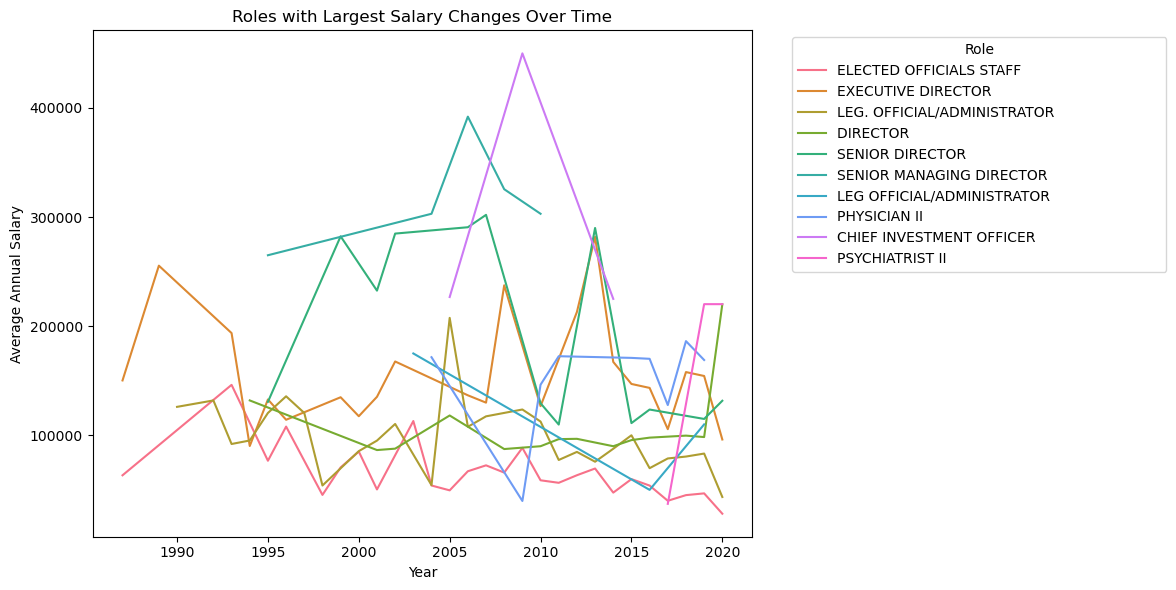

In [26]:
# Calculate salary change over time for each role
role_changes = role_trends.groupby('CLASS TITLE')['ANNUAL'].agg(['min', 'max']).reset_index()
role_changes['Change'] = role_changes['max'] - role_changes['min']

# Select roles with the largest changes
top_changing_roles = role_changes.nlargest(10, 'Change')['CLASS TITLE']

# Filter data for these roles
filtered_changes = role_trends[role_trends['CLASS TITLE'].isin(top_changing_roles)]

# Plot salary trends for these roles
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_changes, x='Year', y='ANNUAL', hue='CLASS TITLE', palette='husl')
plt.title('Roles with Largest Salary Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.legend(title='Role', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

It shows the average annual salaries for various high-level roles from around 1985 to 2020.

The y-axis represents the average annual salary, and the x-axis represents the years.

The graph shows fluctuations and trends in the salaries of these roles over time, indicating changes in compensation dynamics.

This visualization helps in understanding the compensation trends and changes for different roles and departments over time.  

### Report on Challenges Faced in Salary Prediction Project

*Introduction:* Salary prediction projects aim to estimate future salaries based on various factors. This particular project utilizes data from Texas state government agencies, which includes features such as agency names, employee details, job classifications, and compensation data. This report outlines the challenges faced with this dataset and the techniques used to address them.

*1. Data Challenges:*

*a. Missing Values:*

 -*Challenge*: Several features in the dataset had a high percentage of missing values:

duplicated: 99.904336%

multiple_full_time_jobs: 99.990634%

combined_multiple_jobs: 99.935109%

summed_annual_salary: 99.989296%

hide_from_search: 99.989296%

 -*Technique Used*: Feature Removal - Due to the high percentage of missing values, these features were deemed uninformative and were removed from the dataset to maintain the quality and integrity of the data.

*b. Data Outliers:*

 -*Challenge:* Outliers in features such as HRLY RATE, MONTHLY, and ANNUAL can skew the results.

 -*Technique Used:* Outlier Detection and Removal - Statistical methods like IQR were used to identify outliers in salary-related features, which were then removed or capped.

*c. Data Imbalance:*

 -*Challenge:* Imbalance in features can lead to biased model performance.

 -*Technique Used:* Resampling Techniques - Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) were employed to balance the dataset.


*2. Encoding and Standardization Challenges:*

*a. Data Encoding:*

 -*Challenge:* Converting categorical features into numerical values without losing information.

 -*Technique Used:* Encoding Techniques - Techniques like One-Hot Encoding were used for categorical features such as AGENCY NAME, CLASS TITLE, ETHNICITY, and GENDER to convert them into a numerical format suitable for machine learning models.

*b. Data Standardization:*

 -*Challenge:* Ensuring that numerical features are on a similar scale to improve model performance.

 -*Technique Used:* Standardization Methods - Techniques like StandardScaler were used to standardize numerical features such as HRLY RATE, HRS PER WK, MONTHLY, and ANNUAL to have a mean of 0 and a standard deviation of 1.


*3. Feature Selection Challenges:*

*Multicollinearity:*

 -*Challenge:* Highly correlated features (e.g., CLASS CODE, CLASS TITLE, MONTHLY, ANNUAL) can distort model coefficients and interpretation.

 -*Technique Used:* Correlation Matrix Analysis - Heatmap was used to identify and remove highly correlated features, improving model stability.


*Conclusion*: Addressing these challenges was crucial for building a robust and accurate salary prediction model. By carefully handling data quality issues, selecting relevant features, and using appropriate modeling techniques, we developed a model that provides reliable salary predictions and valuable insights for decision-making.